# Fake News Detection task - Main Notebook
Advance Machine Learning **Project** - *A.Y. 2023/24*

**Team**:
*   **Mattia Piazzalunga** - 851931
*   **Nicolò Urbani** - 856213

**Beanchmark datasets**:

*   **WELFake dataset** - Verma et al.
*   **ISOT dataset** - Ahmed et al.




##Main global variables & functions

In [ ]:
path_to_drive_folder = "/content/drive/MyDrive/Advanced_Machine_Learning"
file_name_ISOT_dataset_true = "dataset/ISOT_dataset_true.csv"
file_name_ISOT_dataset_fake = "dataset/ISOT_dataset_false.csv"
file_name_WELFake_dataset = "dataset/WELFake_dataset.csv"
file_slang_acronyms_abbreviations = "txt/slang_acronyms_abbreviations_fact_finder_ai.txt"
file_additional_stop_word="txt/additional_stop_words.txt"
file_name_preprocessed_WELFake_dataset_NO_lemmatization = "preprocessed_dataset/preprocessed_WELFake_dataset_NO_lemmatization.csv"
file_name_preprocessed_ISOT_dataset_NO_lemmatization = "preprocessed_dataset/preprocessed_ISOT_dataset_NO_lemmatization.csv"
file_name_tokenized_basic_WELFake_dataset_with_lemmatization = "preprocessed_dataset/tokenized_basic_WELFake_dataset_with_lemmatization.csv"
file_name_GloVe="models/glove.twitter.27B.100d.txt"
file_name_tokenized_basic_ISOT_dataset_with_lemmatization = "preprocessed_dataset/tokenized_basic_ISOT_dataset_with_lemmatization.csv"
file_name_embedded_GloVe_WELFake_dataset = "preprocessed_dataset/embedded_GloVe_WELFake_dataset.csv"
file_name_embedded_GloVe_ISOT_dataset = "preprocessed_dataset/embedded_GloVe_ISOT_dataset.csv"
file_name_model_lstm_WELFake="models/lstm_WELFake.h5"
file_name_model_bi_lstm_WELFake="models/bi_lstm_WELFake.h5"
file_name_model_bert_WELFake="models/bert_WELFake.h5"
file_name_model_lstm_ISOT="models/lstm_ISOT.h5"
file_name_model_bi_lstm_ISOT="models/bi_lstm_ISOT.h5"
file_name_model_bert_ISOT="models/bert_ISOT.h5"
file_name_model_basic_WELFake="models/basic_WELFake.h5"
file_name_model_basic_ISOT="models/basic_ISOT.h5"
file_name_model_student_WELFake="models/student_WELFake.h5"
file_name_model_student_ISOT="models/student_ISOT.h5"
additional_punctuation = {'“', '”', '‘', '’', '«', '»', '…', '–', '—', '・', '〈', '〉', '《', '》', '「', '」', '『', '』', '【', '】', '〔', '〕', '⁽', '⁾', '₍', '₎', 'ⁱ', 'ⁿ', '₊', '₋', '₌', '₍', '₎', '∙', '•', '⁃', '⁄', '⁑', '⁒', '⁓', '⁕', '⁖', '⁗', '⁘', '⁙', '⁚', '⁛', '⁜', '⁝', '⁞'}
embedding_size = 100
max_features_in_embedding_vector = 10000
max_number_of_words_in_a_comment = 200
tfhub_handle_encoder = "https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1"
tfhub_handle_preprocess = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"

In [ ]:
def plot_performance(history):
  fig, ax = plt.subplots(1, 2)
  fig.tight_layout()
  train_acc = history.history['accuracy']
  valid_acc = history.history['val_accuracy']
  train_loss = history.history['loss']
  valid_loss = history.history['val_loss']

  train_loss_color = '#80cbbf'
  valid_loss_color = '#329c8c'
  train_acc_color = '#80cbbf'
  valid_acc_color = '#329c8c'

  ax[0].set_xlabel('Epoch')
  ax[0].set_ylabel('Loss')
  ax[0].set_title('Loss')

  ax[0].plot(train_loss, label='Training Loss', color=train_loss_color)
  ax[0].plot(valid_loss, label='Validation Loss', color=valid_loss_color)
  ax[0].legend()

  ax[1].set_title('Accuracy')
  ax[1].set_xlabel('Epoch')
  ax[1].set_ylabel('Accuracy')

  ax[1].plot(train_acc, label='Training Accuracy', color=train_acc_color)
  ax[1].plot(valid_acc, label='Validation Accuracy', color=valid_acc_color)
  ax[1].legend()

  plt.show()

## Importing the libraries & data

### Downloading dependencies

In [ ]:
!pip install contractions
!pip install spylls
!pip install tensorflow
!pip install keras
!pip install inflect
!pip install -q -U tensorflow-text
!pip install -q tf-models-official

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.3/106.3 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 17.5 MB/s eta 0:00:00


### Importing the libraries

In [ ]:
#OS
import os as os

#Basic Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import string
import seaborn as sns

#Pre-processing
import html
import pandas as pd
import string
import contractions
import re
import requests
import nltk
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from spylls.hunspell import Dictionary
from nltk.corpus import wordnet
from nltk.corpus import brown
from nltk.stem import WordNetLemmatizer
import inflect

#Keras
import keras
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.models import Model, Sequential
from keras import layers
from keras.layers import Input, Dense, Flatten, Lambda
from keras import regularizers
from keras.models import load_model
from tensorflow.python.framework import ops
from tensorflow.keras.layers import Layer

#TensofrFlow
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Embedding, Conv1D, GlobalMaxPooling1D, Flatten, TextVectorization
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.compat.v1.keras import backend as K
import tensorflow.data as tf_data
from official.nlp import optimization
import tensorflow_hub as hub
import tensorflow_text as text

#LSTM
from keras.layers import Dense, Embedding, LSTM, Bidirectional

#Tokenizer
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer

#Sklearn
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

#Word cloud
import nltk
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('brown')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

### Other global variables

In [ ]:
wordnet_map = {"N":wordnet.NOUN,
               "V":wordnet.VERB,
               "J":wordnet.ADJ,
               "R":wordnet.ADV
              }
inflect_engine = inflect.engine()
punctuation = (string.punctuation) + ''.join(additional_punctuation)

###Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#Set path to correct drive folder
os.chdir(path_to_drive_folder)

Mounted at /content/drive


### Loading useful dictionaries

In [ ]:
#Slan, acronyms and abbreviations dictionary
slang_acronyms_abbreviations = {}

with open(file_slang_acronyms_abbreviations, 'r') as file:
    for line in file:
        key, value = line.strip().split(':')
        slang_acronyms_abbreviations[key] = value

### Loading datasets from Google Drive

In [ ]:
#Load the WELFake dataset
WELFake_dataset = pd.read_csv(file_name_WELFake_dataset, index_col=[0])

#Load the ISOT datasets
ISOT_dataset_true = pd.read_csv(file_name_ISOT_dataset_true)
ISOT_dataset_fake = pd.read_csv(file_name_ISOT_dataset_fake)

In [ ]:
#Creation of a ready-to-use WelFAKE dataset
WELFake_dataset["label"] = np.logical_xor(WELFake_dataset["label"],1).astype(int)

#Creation of a ready-to-use ISOT dataset
ISOT_dataset_fake['label'] = 0
ISOT_dataset_true['label'] = 1

ISOT_dataset = pd.concat([ISOT_dataset_fake, ISOT_dataset_true], ignore_index=True)
ISOT_dataset = ISOT_dataset.sample(frac=1).reset_index(drop=True)

ISOT_dataset = ISOT_dataset.drop(columns=['subject', 'date'])

In [ ]:
#Print dataset WELFake
WELFake_dataset.head()

title  \
0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1                                                NaN   
2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3  Bobby Jindal, raised Hindu, uses story of Chri...   
4  SATAN 2: Russia unvelis an image of its terrif...   

                                                text  label  
0  No comment is expected from Barack Obama Membe...      0  
1     Did they post their votes for Hillary already?      0  
2   Now, most of the demonstrators gathered last ...      0  
3  A dozen politically active pastors came here f...      1  
4  The RS-28 Sarmat missile, dubbed Satan 2, will...      0

In [ ]:
#Print dataset ISOT
ISOT_dataset.head()

title  \
0  French opposition struggles to emerge from rub...   
1  Trump says will speak with China's Xi on North...   
2   Conservatives Throw A Hissy Fit Because Miche...   
3  Trump's defense chief eyes debut trip to Japan...   
4  Northern Ireland leaders appeal to VP Pence on...   

                                                text  label  
0  PARIS (Reuters) - Battered and bruised from el...      1  
1  WASHINGTON (Reuters) - President Donald Trump ...      1  
2  If you want to watch a conservative throw a te...      0  
3  WASHINGTON (Reuters) - U.S. President Donald T...      1  
4  BELFAST (Reuters) - A dispute between Boeing C...      1

## Pre-Processing

### Text cleaning, text normalization & noise removal

In [ ]:
#Remove cdata
def remove_cdata(text):
   pattern = re.compile(r'//\s*\<\s*\!\[cdata\[(.*?)//\s*\]\]', re.DOTALL)
   return re.sub(pattern, '', text)

#Remove urls
def remove_urls(text):
    return re.sub(r"https?://\S+|www\.\S+", "", text)

#Replace html entities
def replace_entities(text):
    return html.unescape(text)

#Remove html tags
def remove_html_tags(text):
    soup = BeautifulSoup(text, "html5lib")
    return soup.get_text()

#Remove email
def remove_emails(text):
    text=re.sub(r'([a-zA-Z0-9_\-\.\*\(\)]+)@([a-zA-Z0-9_\-\.\*\(\)]+)\.([a-zA-Z]{0,5})', "", text)
    return text

#Remove mentions
def remove_mentions(text):
    pattern = re.compile(r"@\w+")
    text = re.sub(pattern, "", text)
    return text

#Remove special characters
def remove_special_characters(text):
    emoji_pattern = re.compile(
        '['
        u'\U0001F600-\U0001F64F'  # emoticons
        u'\U0001F300-\U0001F5FF'  # symbols & pictographs
        u'\U0001F680-\U0001F6FF'  # transport & map symbols
        u'\U0001F1E0-\U0001F1FF'  # flags (iOS)
        u'\U00002702-\U000027B0'
        u'\U000024C2-\U0001F251'
        ']+',
        flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

#Replace slang, acronyms, abbreviations & tanslation
def slang_acronyms_abbreviations_tanslation(text):
    keys_pattern = '|'.join(re.escape(key) for key in slang_acronyms_abbreviations.keys())
    slang_acronyms_abbreviations_pattern = re.compile(r'(?<!\w)(' + keys_pattern + r')(?!\w)')
    text = slang_acronyms_abbreviations_pattern.sub(lambda x: slang_acronyms_abbreviations[x.group()], text)
    return text

#Add space after punctuation
def space_after_punctuation(text):
    return re.sub(r'(?<=[.,;!?])\s*|(?<!\s)[.,;!?](?!\s)', r' ', text)

#Spelling correction
hunspell = Dictionary.from_files("en_US")

def correct_spelling(word):
    if hunspell.lookup(word):
        return word
    else:
        suggestions = list(hunspell.suggest(word))
        return suggestions[0] if suggestions else word

#Convert numbers to words
def convert_numbers_to_words(text):
  new_string=[]
  for word in text.split():
      if word.isdigit():
          temp = inflect_engine.number_to_words(word)
          new_string.append(temp)
      else:
          new_string.append(word)

  return ' '.join(new_string)

#Preprocessing of the entire dataset
def preprocessing_of_entire_dataset(dataset):

  #Transform everything "toLowerCase"
  dataset = dataset.applymap(lambda x: x.lower() if isinstance(x, str) else x)

  #Drop NaN and merge title and text columns
  dataset = dataset.replace("nan", np.nan)
  columns_to_merge = ['title', 'text']
  dataset['merged_column'] = dataset[columns_to_merge].apply(lambda row: ' '.join([str(val) for val in row if not pd.isna(val)]), axis=1)
  dataset = dataset.drop(['title', 'text'], axis=1)
  dataset = dataset.rename(columns={'merged_column': 'text'})
  dataset= dataset[dataset['text'].notna()]

  #Reset index
  dataset = dataset.reset_index(drop=True)

  return dataset

def process_text(text, with_spelling_correction = False):
  #Remove spaces before and after the strings
  text = text.strip()

  #Turn muliple spaces into one
  text = ' '.join(text.split())

  #Remove cdata from the text
  text = remove_cdata(text)

  #Remove urls from the text
  text = remove_urls(text)

  #Replace html entities from the text
  text = replace_entities(text)

  #Remove html tags from the text
  text = remove_html_tags(text)

  #Remove emails from the text
  text = remove_emails(text)

  #Remove mentions from the text
  text = remove_mentions(text)

  #Remove special characters from the text
  text = remove_special_characters(text)

  #Replace slang, acronyms, abbreviations & tanslation
  text = slang_acronyms_abbreviations_tanslation(text)

  #Expand the contractions
  text = contractions.fix(str(text))

  #Add space after punctuation
  text = space_after_punctuation(text)

  #Remove all punctuation marks from all columns
  text = text.translate(str.maketrans("", "", punctuation))

  #Turn muliple spaces into one
  text = ' '.join(text.split())

  #Spelling correction of the text
  if(with_spelling_correction):
    text = ' '.join(correct_spelling(word) for word in text.split())

  #Convert numbers to words
  text = convert_numbers_to_words(text)

  return text

#Preprocess the single text
def efficient_preprocessing(dataset, column_name):
    dataset[column_name] = dataset[column_name].apply(process_text)
    return dataset

In [ ]:
#Complex & Complete preprocessing of the WELFake dataset
%%time
preprocessed_WELFake_dataset = preprocessing_of_entire_dataset(WELFake_dataset)
preprocessed_WELFake_dataset = efficient_preprocessing(preprocessed_WELFake_dataset, "text")

<ipython-input-12-58ee90b98c2c>:16: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html5lib")


CPU times: user 4min 23s, sys: 1.06 s, total: 4min 24s
Wall time: 4min 28s


In [ ]:
#Complex & Complete preprocessing of the ISOT dataset
%%time
preprocessed_ISOT_dataset = preprocessing_of_entire_dataset(ISOT_dataset)
preprocessed_ISOT_dataset = efficient_preprocessing(preprocessed_ISOT_dataset, "text")

#Remove all reference to Reuters in the text
preprocessed_ISOT_dataset['text'] = preprocessed_ISOT_dataset['text'].apply(lambda x: x.split("(reuters) - ", 1)[-1])

<ipython-input-12-58ee90b98c2c>:16: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html5lib")


CPU times: user 2min 5s, sys: 331 ms, total: 2min 6s
Wall time: 2min 6s


In [ ]:
#Print dataset WELFake
preprocessed_WELFake_dataset.head()

label                                               text
0      0  law enforcement on high alert following threat...
1      0      did they post their votes for hillary already
2      0  unbelievable obamas attorney general says most...
3      1  bobby jindal raised hindu uses story of christ...
4      0  satan two russia unvelis an image of its terri...

In [ ]:
#Print dataset ISOT
preprocessed_ISOT_dataset.head()

label                                               text
0      1  french opposition struggles to emerge from rub...
1      1  trump says will speak with chinas xi on north ...
2      0  conservatives throw a hissy fit because michel...
3      1  trumps defense chief eyes debut trip to japan ...
4      1  northern ireland leaders appeal to vp pence on...

### Stop-Words Removal

In [ ]:
#Load additional stop words
with open(file_additional_stop_word, 'r') as file:
    stopwords_list = file.read()
additional_stopwords = stopwords_list.splitlines()

In [ ]:
#Stop-Words removal function
stop_words = set(stopwords.words('english'))
stop_words.update(additional_stopwords)
def remove_stop_words(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])

In [ ]:
#WELFake without stop-words
%%time
preprocessed_WELFake_dataset["text"] = preprocessed_WELFake_dataset["text"].apply(remove_stop_words)

CPU times: user 5.62 s, sys: 18 ms, total: 5.64 s
Wall time: 5.64 s


In [ ]:
#ISOT without stop-words
%%time
preprocessed_ISOT_dataset["text"] = preprocessed_ISOT_dataset["text"].apply(remove_stop_words)

CPU times: user 3.35 s, sys: 12.9 ms, total: 3.36 s
Wall time: 3.42 s


In [ ]:
#If any field becomes NaN after removing stop words it is removed.
preprocessed_WELFake_dataset=preprocessed_WELFake_dataset[preprocessed_WELFake_dataset['text'].notna()]
preprocessed_ISOT_dataset=preprocessed_ISOT_dataset[preprocessed_ISOT_dataset['text'].notna()]

In [ ]:
#Print dataset WELFake
preprocessed_WELFake_dataset.head()

label                                               text
0      0  law enforcement alert threats cops whites 911b...
1      0                                 post votes hillary
2      0  unbelievable obamas attorney charlotte rioters...
3      1  bobby jindal raised hindu story christian conv...
4      0  satan russia unvelis image terrifying supernuk...

In [ ]:
#Print dataset ISOT
preprocessed_ISOT_dataset.head()

label                                               text
0      1  french opposition struggles emerge rubble macr...
1      1  trump speak chinas xi north korea friday washi...
2      0  conservatives throw hissy fit michelle obama t...
3      1  trumps defense chief eyes debut trip japan sou...
4      1  northern ireland leaders appeal vp pence bomba...

### POS and Lemmatizer

In [ ]:
train_sents = brown.tagged_sents(categories='news')
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_sents, backoff=t0)
t2 = nltk.BigramTagger(train_sents, backoff=t1)

#POS tagging
def pos_tag(text, pos_tag_type="pos_tag"):
    pos_tagged_text = t2.tag(text)
    pos_tagged_text = [(word, wordnet_map.get(pos_tag[0])) if pos_tag[0] in wordnet_map.keys() else (word, wordnet.NOUN) for (word, pos_tag) in pos_tagged_text]
    return pos_tagged_text

#Lemmatizer for single word
def lemmatize_word(text):
    lemmatizer = WordNetLemmatizer()
    lemma = [lemmatizer.lemmatize(word, tag) for word, tag in text]
    return lemma

#Lemmatizer with POS
def lemmatizer_with_POS(dataframe, column_pos_tag="pos_tag", column_lemmatized="lemmatized"):
  lemmatizer = WordNetLemmatizer()

  dataframe[column_lemmatized] = dataframe[column_pos_tag].apply(lambda x: lemmatize_word(x))
  dataframe[column_lemmatized] = [' '.join(map(str, l)) for l in dataframe[column_lemmatized]] # join back to text
  return dataframe

###Removing generated NaN

In [ ]:
#Removing generated NaN - WELFake
preprocessed_WELFake_dataset = preprocessed_WELFake_dataset.replace('', pd.NA).dropna()

In [ ]:
#Removing generated NaN - ISOT
preprocessed_ISOT_dataset = preprocessed_ISOT_dataset.replace('', pd.NA).dropna()

### Saving of pre-processed datasets

In [ ]:
#Saving WELFake preprocessed
preprocessed_WELFake_dataset.to_csv(file_name_preprocessed_WELFake_dataset_NO_lemmatization,  index=False)

#Saving ISOT preprocessed
preprocessed_ISOT_dataset.to_csv(file_name_preprocessed_ISOT_dataset_NO_lemmatization,  index=False)

### Loading of pre-processed datasets

In [ ]:
#Loading WELFake preprocessed
preprocessed_WELFake_dataset = pd.read_csv(file_name_preprocessed_WELFake_dataset_NO_lemmatization)

#Loading ISOT preprocessed
preprocessed_ISOT_dataset = pd.read_csv(file_name_preprocessed_ISOT_dataset_NO_lemmatization)

## Explorative Analysis

### Target variables distributions

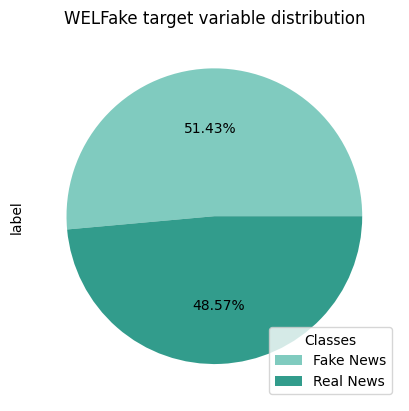

In [ ]:
#WELFake target variable distribution
labels = ["Fake News", "Real News"]
colors = ["#80cbbf", "#329c8c"]

preprocessed_WELFake_dataset['label'].value_counts().plot.pie(autopct='%.2f%%', labels=None, colors=colors, title="WELFake target variable distribution")

plt.legend(labels, title="Classes", loc="lower right")

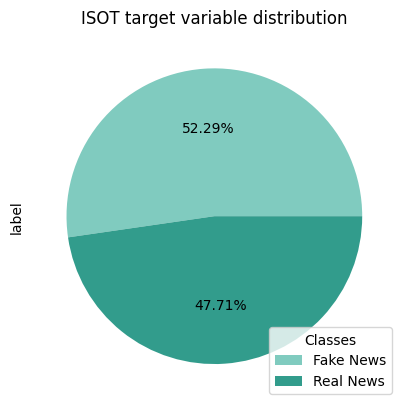

In [ ]:
#ISOT target variable distribution
labels = ["Fake News", "Real News"]
colors = ["#80cbbf", "#329c8c"]

preprocessed_ISOT_dataset['label'].value_counts().plot.pie(autopct='%.2f%%', labels=None, colors=colors, title="ISOT target variable distribution")

plt.legend(labels, title="Classes", loc="lower right")

### Real news vs Fake News - Length Comparation

Text(0.5, 1.0, 'Real news vs Fake News - WELFake length Comparation')

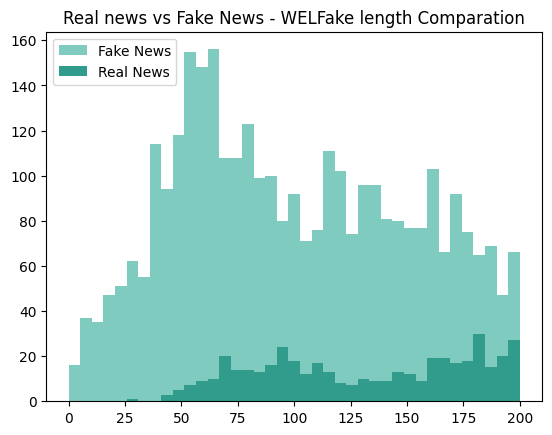

In [ ]:
#Real news vs Fake News - WELFake length Comparation
analysis_dataframe = pd.DataFrame()
analysis_dataframe["label"] =  preprocessed_WELFake_dataset["label"]
analysis_dataframe["text_length"] = preprocessed_WELFake_dataset["text"].apply(lambda x: len(str(x)) - str(x).count(" "))

bins = np.linspace(0, 200, 40)

plt.hist(analysis_dataframe[analysis_dataframe["label"]==0]["text_length"], bins, label="Fake News", color="#80cbbf")
plt.hist(analysis_dataframe[analysis_dataframe["label"]==1]["text_length"], bins, label="Real News", color="#329c8c")

plt.legend(loc="upper left")

plt.title('Real news vs Fake News - WELFake length Comparation')

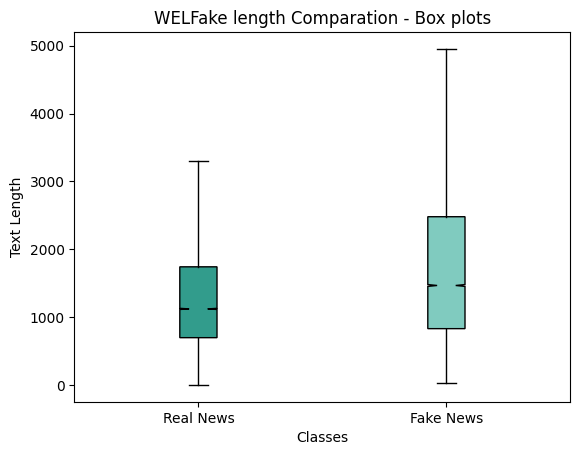

In [ ]:
#Real news vs Fake News - WELFake length Comparation
data = [analysis_dataframe[analysis_dataframe['label'] == label]['text_length'].values for label in analysis_dataframe['label'].unique()]

bplot = plt.boxplot(data, notch=True, vert=True, patch_artist=True, labels=['Real News', 'Fake News'], showfliers=False)

colors = ['#329c8c', '#80cbbf']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

for median_line in bplot['medians']:
    median_line.set_visible(False)

plt.title("WELFake length Comparation - Box plots")
plt.xlabel("Classes")
plt.grid(False)
plt.ylabel("Text Length")
plt.show()

Text(0.5, 1.0, 'Real news vs Fake News - ISOT length Comparation')

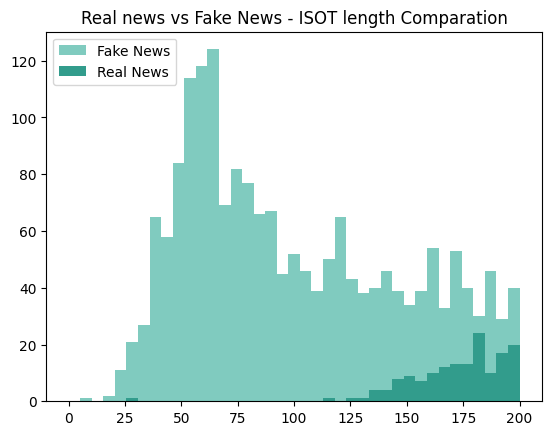

In [ ]:
#Real news vs Fake News - ISOT length Comparation
analysis_dataframe = pd.DataFrame()
analysis_dataframe["label"] =  preprocessed_ISOT_dataset["label"]
analysis_dataframe["text_length"] = preprocessed_ISOT_dataset["text"].apply(lambda x: len(str(x)) - str(x).count(" "))

bins = np.linspace(0, 200, 40)

plt.hist(analysis_dataframe[analysis_dataframe["label"]==0]["text_length"], bins, label="Fake News", color="#80cbbf")
plt.hist(analysis_dataframe[analysis_dataframe["label"]==1]["text_length"], bins, label="Real News", color="#329c8c")
plt.legend(loc="upper left")

plt.title('Real news vs Fake News - ISOT length Comparation')

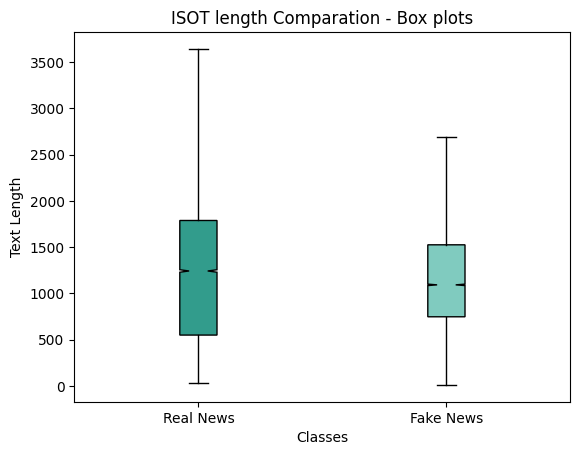

In [ ]:
#Real news vs Fake News - ISOT length Comparation
data = [analysis_dataframe[analysis_dataframe['label'] == label]['text_length'].values for label in analysis_dataframe['label'].unique()]

bplot = plt.boxplot(data, notch=True, vert=True, patch_artist=True, labels=['Real News', 'Fake News'], showfliers=False)

colors = ['#329c8c', '#80cbbf']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

for median_line in bplot['medians']:
    median_line.set_visible(False)

plt.title("ISOT length Comparation - Box plots")
plt.xlabel("Classes")
plt.grid(False)
plt.ylabel("Text Length")
plt.show()

###Most frequent words in Real News

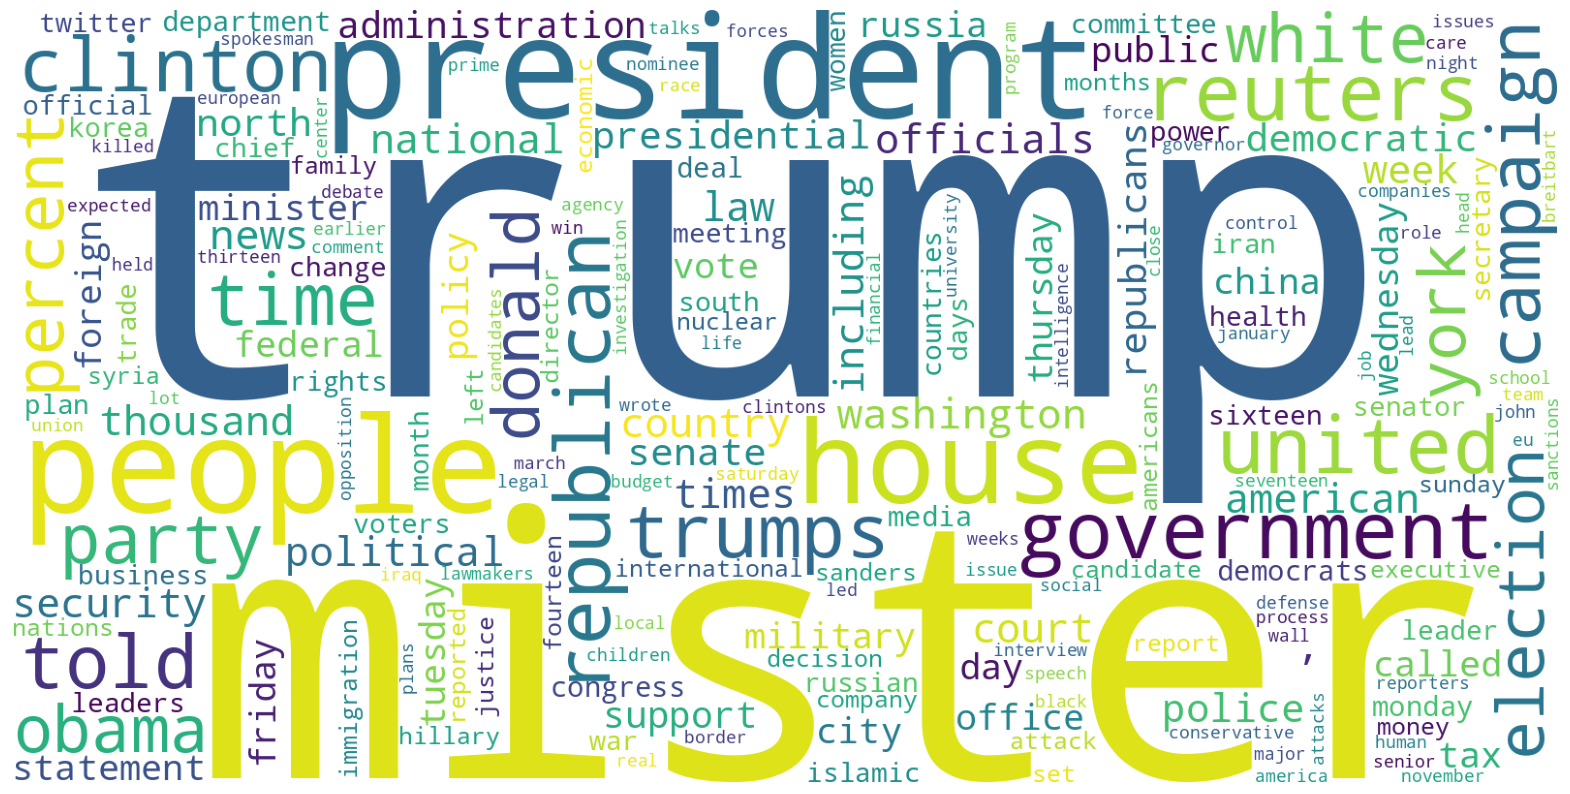

In [ ]:
#Most frequent words in Real News - WELFake
real = preprocessed_WELFake_dataset.loc[preprocessed_WELFake_dataset['label'] == 1]
real_tokens = [word_tokenize(str(sublist)) for sublist in real['text']]

real_words = [item for sublist in real_tokens for item in sublist]

fig = plt.figure(figsize=(20,14))
wordcloud = WordCloud(width=1600, height=800, background_color="white").generate_from_frequencies(Counter(real_words))
plt.axis("off")
plt.imshow(wordcloud, interpolation='antialiased')

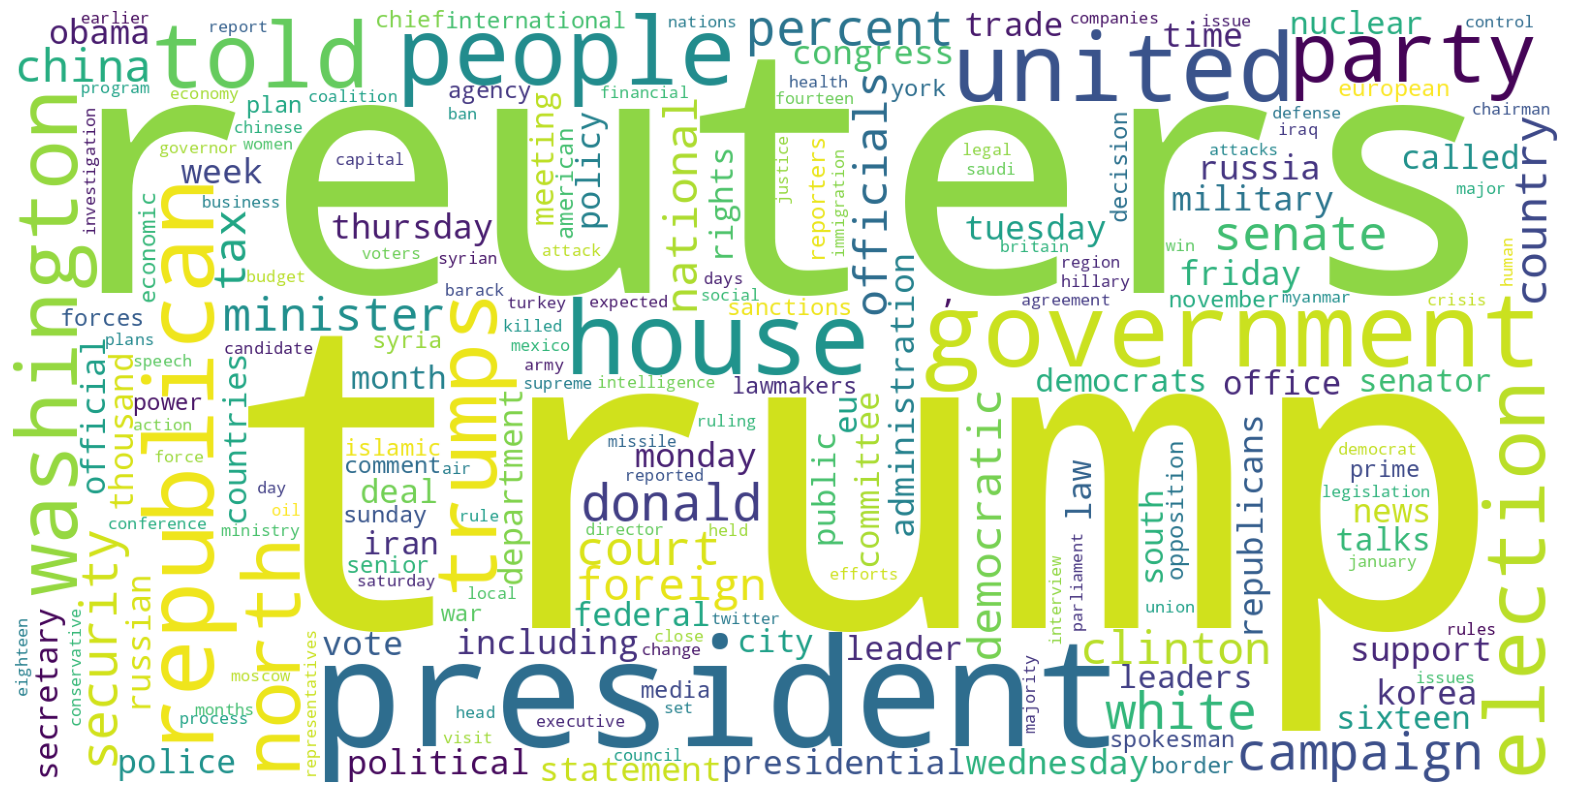

In [ ]:
#Most frequent words in Real News - ISOT
real = preprocessed_ISOT_dataset.loc[preprocessed_ISOT_dataset['label'] == 1]
real_tokens = [word_tokenize(str(sublist)) for sublist in real['text']]

real_words = [item for sublist in real_tokens for item in sublist]

fig = plt.figure(figsize=(20,14))
wordcloud = WordCloud(width=1600, height=800, background_color="white").generate_from_frequencies(Counter(real_words))
plt.axis("off")
plt.imshow(wordcloud, interpolation='antialiased')

###Most frequent words in Fake News

> Blocco con rientro



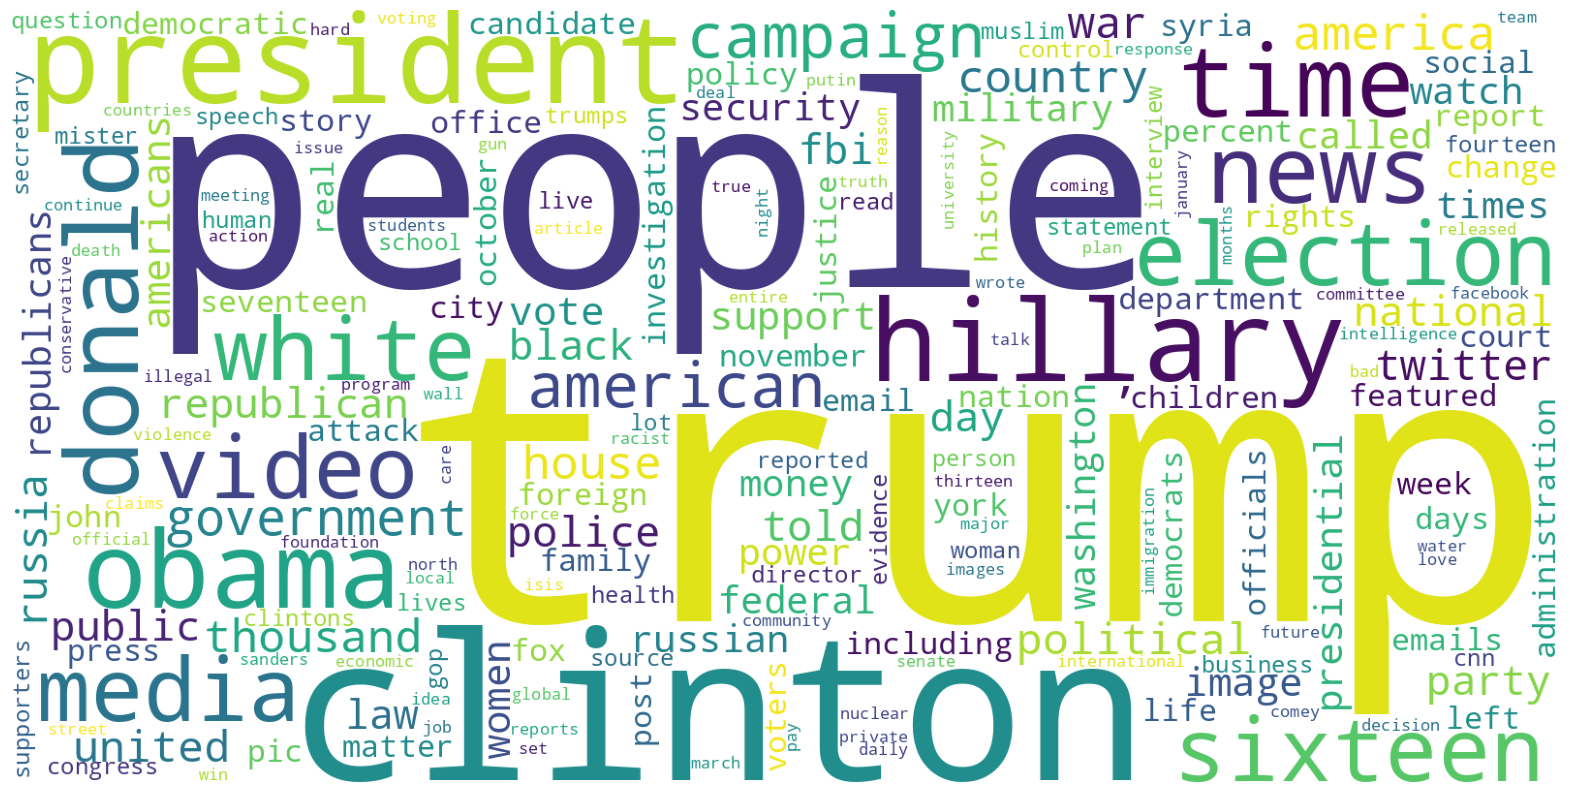

In [ ]:
#Most frequent words in Fake News - WELFake
real = preprocessed_WELFake_dataset.loc[preprocessed_WELFake_dataset['label'] == 0]
real_tokens = [word_tokenize(str(sublist)) for sublist in real['text']]

real_words = [item for sublist in real_tokens for item in sublist]

fig = plt.figure(figsize=(20,14))
wordcloud = WordCloud(width=1600, height=800, background_color="white").generate_from_frequencies(Counter(real_words))
plt.axis("off")
plt.imshow(wordcloud, interpolation='antialiased')

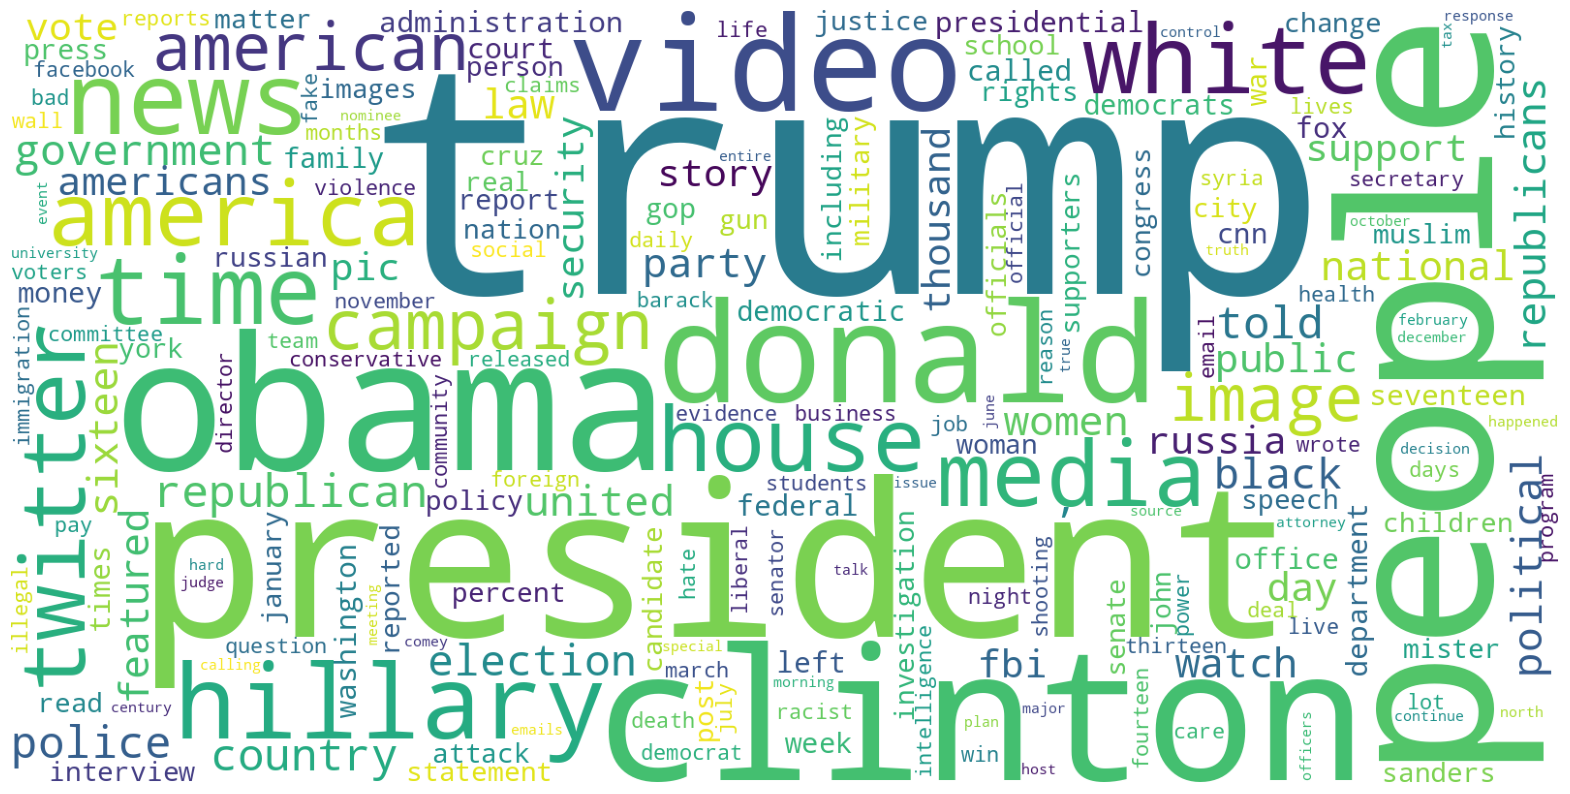

In [ ]:
#Most frequent words in Real News - ISOT
real = preprocessed_ISOT_dataset.loc[preprocessed_ISOT_dataset['label'] == 0]
real_tokens = [word_tokenize(str(sublist)) for sublist in real['text']]

real_words = [item for sublist in real_tokens for item in sublist]

fig = plt.figure(figsize=(20,14))
wordcloud = WordCloud(width=1600, height=800, background_color="white").generate_from_frequencies(Counter(real_words))
plt.axis("off")
plt.imshow(wordcloud, interpolation='antialiased')

##Base tokenization

###Tokenization of the datastes

In [ ]:
#Basic tokenizer
def basic_tokenizer(old_dataframe, column="text"):
  old_dataframe['tokenized'] = old_dataframe[column].astype(str).apply(word_tokenize)
  return old_dataframe

In [ ]:
%%time
#Basic tokenization of WELFake with lemmatization
preprocessed_WELFake_dataset=basic_tokenizer(preprocessed_WELFake_dataset)

CPU times: user 1min 9s, sys: 685 ms, total: 1min 10s
Wall time: 1min 11s


In [ ]:
%%time
#Basic tokenization of ISOT with lemmatization
preprocessed_ISOT_dataset=basic_tokenizer(preprocessed_ISOT_dataset)

CPU times: user 33.8 s, sys: 422 ms, total: 34.2 s
Wall time: 34.4 s


In [ ]:
#Print dataset WELFake
preprocessed_WELFake_dataset.head()

label                                               text  \
0      0  law enforcement alert threats cops whites 911b...   
1      0                                 post votes hillary   
2      0  unbelievable obamas attorney charlotte rioters...   
3      1  bobby jindal raised hindu story christian conv...   
4      0  satan russia unvelis image terrifying supernuk...   

                                           tokenized  
0  [law, enforcement, alert, threats, cops, white...  
1                             [post, votes, hillary]  
2  [unbelievable, obamas, attorney, charlotte, ri...  
3  [bobby, jindal, raised, hindu, story, christia...  
4  [satan, russia, unvelis, image, terrifying, su...

In [ ]:
#Print dataset ISOT
preprocessed_ISOT_dataset.head()

label                                               text  \
0      1  french opposition struggles emerge rubble macr...   
1      1  trump speak chinas xi north korea friday washi...   
2      0  conservatives throw hissy fit michelle obama t...   
3      1  trumps defense chief eyes debut trip japan sou...   
4      1  northern ireland leaders appeal vp pence bomba...   

                                           tokenized  
0  [french, opposition, struggles, emerge, rubble...  
1  [trump, speak, chinas, xi, north, korea, frida...  
2  [conservatives, throw, hissy, fit, michelle, o...  
3  [trumps, defense, chief, eyes, debut, trip, ja...  
4  [northern, ireland, leaders, appeal, vp, pence...

###Lemmatization of the datasets

In [ ]:
%%time
#Lemmatization of the WELFake
preprocessed_WELFake_dataset['pos_tag'] = preprocessed_WELFake_dataset['tokenized'].apply(lambda x: pos_tag(x))
preprocessed_WELFake_dataset=lemmatizer_with_POS(preprocessed_WELFake_dataset)

CPU times: user 1min 39s, sys: 1.21 s, total: 1min 40s
Wall time: 1min 42s


In [ ]:
%%time
#Lemmatization of the ISOT
preprocessed_ISOT_dataset['pos_tag'] = preprocessed_ISOT_dataset['tokenized'].apply(lambda x: pos_tag(x))
preprocessed_ISOT_dataset=lemmatizer_with_POS(preprocessed_ISOT_dataset)

CPU times: user 46.3 s, sys: 517 ms, total: 46.8 s
Wall time: 47.1 s


In [ ]:
#Print dataset WELFake
preprocessed_WELFake_dataset.head()

label                                               text  \
0      0  law enforcement alert threats cops whites 911b...   
1      0                                 post votes hillary   
2      0  unbelievable obamas attorney charlotte rioters...   
3      1  bobby jindal raised hindu story christian conv...   
4      0  satan russia unvelis image terrifying supernuk...   

                                           tokenized  \
0  [law, enforcement, alert, threats, cops, white...   
1                             [post, votes, hillary]   
2  [unbelievable, obamas, attorney, charlotte, ri...   
3  [bobby, jindal, raised, hindu, story, christia...   
4  [satan, russia, unvelis, image, terrifying, su...   

                                             pos_tag  \
0  [(law, n), (enforcement, n), (alert, a), (thre...   
1              [(post, n), (votes, n), (hillary, n)]   
2  [(unbelievable, n), (obamas, n), (attorney, n)...   
3  [(bobby, n), (jindal, n), (raised, v), (hindu,...   
4  [(satan, n), (russia, n), (unvelis, n), (image...   

                                          lemmatized  
0  law enforcement alert threat cop white 911by b...  
1                                  post vote hillary  
2  unbelievable obamas attorney charlotte rioter ...  
3  bobby jindal raise hindu story christian conve...  
4  satan russia unvelis image terrifying supernuk...

In [ ]:
#Print dataset ISOT
preprocessed_ISOT_dataset.head()

label                                               text  \
0      1  french opposition struggles emerge rubble macr...   
1      1  trump speak chinas xi north korea friday washi...   
2      0  conservatives throw hissy fit michelle obama t...   
3      1  trumps defense chief eyes debut trip japan sou...   
4      1  northern ireland leaders appeal vp pence bomba...   

                                           tokenized  \
0  [french, opposition, struggles, emerge, rubble...   
1  [trump, speak, chinas, xi, north, korea, frida...   
2  [conservatives, throw, hissy, fit, michelle, o...   
3  [trumps, defense, chief, eyes, debut, trip, ja...   
4  [northern, ireland, leaders, appeal, vp, pence...   

                                             pos_tag  \
0  [(french, n), (opposition, n), (struggles, n),...   
1  [(trump, n), (speak, v), (chinas, n), (xi, n),...   
2  [(conservatives, n), (throw, v), (hissy, n), (...   
3  [(trumps, n), (defense, n), (chief, n), (eyes,...   
4  [(northern, a), (ireland, n), (leaders, n), (a...   

                                          lemmatized  
0  french opposition struggle emerge rubble macro...  
1  trump speak china xi north korea friday washin...  
2  conservative throw hissy fit michelle obama ta...  
3  trump defense chief eye debut trip japan south...  
4  northern ireland leader appeal vp penny bombar...

###Saving of basic tokenized datasets with lemmatization

In [ ]:
#Saving WELFake tokenized with lemmatization
preprocessed_WELFake_dataset.to_csv(file_name_tokenized_basic_WELFake_dataset_with_lemmatization,  index=False)

#Saving ISOT tokenized with lemmatization
preprocessed_ISOT_dataset.to_csv(file_name_tokenized_basic_ISOT_dataset_with_lemmatization,  index=False)

###Loading of basic tokenized datasets with lemmatization

In [ ]:
#Loading WELFake tokenized with lemmatization
preprocessed_WELFake_dataset = pd.read_csv(file_name_tokenized_basic_WELFake_dataset_with_lemmatization)

#Loading ISOT tokenized with lemmatization
preprocessed_ISOT_dataset = pd.read_csv(file_name_tokenized_basic_ISOT_dataset_with_lemmatization)

## Models with GloVe

###Splits based on base tokenization

In [ ]:
#Split WELFake dataset
X_train_WELFake, X_test_WELFake, y_train_WELFake, y_test_WELFake = train_test_split(
    preprocessed_WELFake_dataset["lemmatized"].astype(str),
    preprocessed_WELFake_dataset["label"],
    stratify=preprocessed_WELFake_dataset["label"],
    test_size=0.2,
    random_state=42)

X_train_WELFake, X_validation_WELFake, y_train_WELFake, y_validation_WELFake = train_test_split(
    X_train_WELFake, y_train_WELFake,
    stratify=y_train_WELFake,
    test_size=0.2,
    random_state=42
)

NameError: name 'preprocessed_WELFake_dataset' is not defined

In [ ]:
#Split ISOT dataset
X_train_ISOT, X_test_ISOT, y_train_ISOT, y_test_ISOT = train_test_split(
    preprocessed_ISOT_dataset["lemmatized"].astype(str),
    preprocessed_ISOT_dataset["label"],
    stratify=preprocessed_ISOT_dataset["label"],
    test_size=0.2,
    random_state=42)

X_train_ISOT, X_validation_ISOT, y_train_ISOT, y_validation_ISOT = train_test_split(
    X_train_ISOT, y_train_ISOT,
    stratify=y_train_ISOT,
    test_size=0.2,
    random_state=42
)

###Transform tokens to sequences

In [ ]:
%%time
#Tokens to sequence for WELFake
vectorizer_WELFake = layers.TextVectorization(max_tokens=max_features_in_embedding_vector, output_sequence_length=embedding_size)
text_ds = tf_data.Dataset.from_tensor_slices(X_train_WELFake).batch(128)
vectorizer_WELFake.adapt(text_ds)

vocabulary_WELFake = vectorizer_WELFake.get_vocabulary()
word_index_WELFake = dict(zip(vocabulary_WELFake, range(len(vocabulary_WELFake))))

CPU times: user 4.88 s, sys: 405 ms, total: 5.29 s
Wall time: 6.05 s


In [ ]:
%%time
#Tokens to sequence for ISOT
vectorizer_ISOT = layers.TextVectorization(max_tokens=max_features_in_embedding_vector, output_sequence_length=embedding_size)
text_ds = tf_data.Dataset.from_tensor_slices(X_train_ISOT).batch(128)
vectorizer_ISOT.adapt(text_ds)

vocabulary_ISOT = vectorizer_ISOT.get_vocabulary()
word_index_ISOT = dict(zip(vocabulary_ISOT, range(len(vocabulary_ISOT))))

CPU times: user 1.96 s, sys: 86.7 ms, total: 2.05 s
Wall time: 1.87 s


###Generate the embedding layer

In [ ]:
def embedding_layer_generator(vocabulary, word_index, embedding_size, file_name_GloVe):
  embeddings_index = {}
  with open(file_name_GloVe) as f:
      for line in f:
          word, coefs = line.split(maxsplit=1)
          coefs = np.fromstring(coefs, "f", sep=" ")
          embeddings_index[word] = coefs
  num_tokens = len(vocabulary) + 2

  embedding_matrix = np.zeros((num_tokens, embedding_size))
  for word, i in word_index.items():
      embedding_vector = embeddings_index.get(word)
      if embedding_vector is not None:
          embedding_matrix[i] = embedding_vector

  embedding_layer = Embedding(
      num_tokens,
      embedding_size,
      trainable=False,
  )
  embedding_layer.build((1,))
  embedding_layer.set_weights([embedding_matrix])

  return embedding_layer

In [ ]:
%%time
#Generate the embeddings layer for WELFake
WELFake_embedding_layer=embedding_layer_generator(vocabulary_WELFake, word_index_WELFake, embedding_size, file_name_GloVe)

CPU times: user 26.7 s, sys: 2.08 s, total: 28.8 s
Wall time: 37.3 s


In [ ]:
%%time
#Generate the embeddings layer for ISOT
ISOT_embedding_layer=embedding_layer_generator(vocabulary_ISOT, word_index_ISOT, embedding_size, file_name_GloVe)

CPU times: user 25.1 s, sys: 848 ms, total: 26 s
Wall time: 26.9 s


### Basic NN - Training models

#### About WELFake

In [ ]:
%%time
#Convert list-of-strings data to NumPy arrays of integer indices - WELFake
batch_size = 1000
X_train = []
for i in range(0, len(X_train_WELFake), batch_size):
    batch = X_train_WELFake[i:i+batch_size]
    X_train.append(vectorizer_WELFake(np.array([[s] for s in batch])).numpy())
X_train = np.concatenate(X_train, axis=0)

X_val = []
for i in range(0, len(X_validation_WELFake), batch_size):
    batch = X_validation_WELFake[i:i+batch_size]
    X_val.append(vectorizer_WELFake(np.array([[s] for s in batch])).numpy())
X_val = np.concatenate(X_val, axis=0)

X_test = []
for i in range(0, len(X_test_WELFake), batch_size):
    batch = X_test_WELFake[i:i+batch_size]
    X_test.append(vectorizer_WELFake(np.array([[s] for s in batch])).numpy())
X_test = np.concatenate(X_test, axis=0)

y_train =  np.array(y_train_WELFake)
y_val = np.array(y_validation_WELFake)
y_test = np.array(y_test_WELFake)

CPU times: user 10.8 s, sys: 5.68 s, total: 16.5 s
Wall time: 17.5 s


In [ ]:
#Creation of the basic model - WELFake
int_sequences_input = keras.Input(shape=(None,), dtype="int32")
embedded_sequences = WELFake_embedding_layer(int_sequences_input)
x = layers.Conv1D(64, 5, activation='relu')(embedded_sequences)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
preds = layers.Dense(1, activation='sigmoid')(x)

basic_model_WELFake = keras.Model(int_sequences_input, preds)

optimizer = keras.optimizers.Adam(learning_rate=0.0001)
basic_model_WELFake.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
#Summary of the basic model - WELFake
basic_model_WELFake.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding (Embedding)       (None, None, 100)         1000200   
                                                                 
 conv1d (Conv1D)             (None, None, 64)          32064     
                                                                 
 global_max_pooling1d (Glob  (None, 64)                0         
 alMaxPooling1D)                                                 
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                             

In [ ]:
%%time
#Basic model training - WELFake
history_WELFake = basic_model_WELFake.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/5
722/722 [==============================] - 9s 5ms/step - loss: 1.1670 - accuracy: 0.6211 - val_loss: 0.9065 - val_accuracy: 0.7834
Epoch 2/5
722/722 [==============================] - 3s 5ms/step - loss: 0.8239 - accuracy: 0.7736 - val_loss: 0.6545 - val_accuracy: 0.8332
Epoch 3/5
722/722 [==============================] - 3s 5ms/step - loss: 0.6168 - accuracy: 0.8363 - val_loss: 0.4917 - val_accuracy: 0.8862
Epoch 4/5
722/722 [==============================] - 5s 6ms/step - loss: 0.4846 - accuracy: 0.8734 - val_loss: 0.3971 - val_accuracy: 0.9029
Epoch 5/5
722/722 [==============================] - 4s 5ms/step - loss: 0.4044 - accuracy: 0.8901 - val_loss: 0.3430 - val_accuracy: 0.9084
CPU times: user 23.4 s, sys: 1.86 s, total: 25.3 s
Wall time: 24.5 s


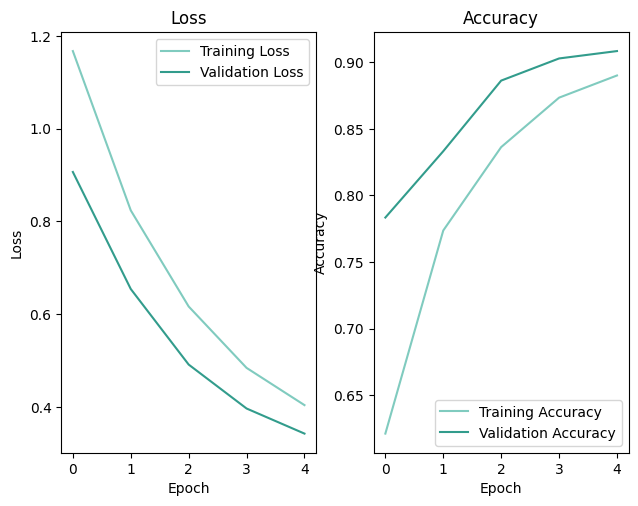

In [ ]:
#Plotting WELFake performance
plot_performance(history_WELFake)

451/451 [==============================] - 1s 2ms/step
Accuracy: 0.9126455906821963
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      7418
           1       0.95      0.86      0.91      7006

    accuracy                           0.91     14424
   macro avg       0.92      0.91      0.91     14424
weighted avg       0.92      0.91      0.91     14424

CPU times: user 1.47 s, sys: 120 ms, total: 1.59 s
Wall time: 1.59 s


<Axes: xlabel='Predicted', ylabel='Actual'>

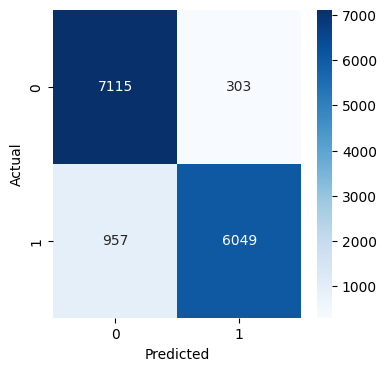

In [ ]:
%%time
#Plotting the performance on test set
y_pred = basic_model_WELFake.predict(X_test)
y_pred = [1 if x[0] > 0.5 else 0 for x in y_pred]

print("Accuracy:", accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

confusion_matrix_m = confusion_matrix(y_test, y_pred)

confusion_matrix_m = pd.DataFrame(confusion_matrix_m, index=[0,1], columns=[0,1])
confusion_matrix_m.index.name = 'Actual'
confusion_matrix_m.columns.name = 'Predicted'

plt.figure(figsize = (4,4))
sns.heatmap(confusion_matrix_m, cmap= "Blues",annot = True, fmt='')

#### About ISOT

In [ ]:
#Convert list-of-strings data to NumPy arrays of integer indices - ISOT
batch_size = 1000
X_train = []
for i in range(0, len(X_train_ISOT), batch_size):
    batch = X_train_ISOT[i:i+batch_size]
    X_train.append(vectorizer_ISOT(np.array([[s] for s in batch])).numpy())
X_train = np.concatenate(X_train, axis=0)

X_val = []
for i in range(0, len(X_validation_ISOT), batch_size):
    batch = X_validation_ISOT[i:i+batch_size]
    X_val.append(vectorizer_ISOT(np.array([[s] for s in batch])).numpy())
X_val = np.concatenate(X_val, axis=0)

X_test = []
for i in range(0, len(X_test_ISOT), batch_size):
    batch = X_test_ISOT[i:i+batch_size]
    X_test.append(vectorizer_ISOT(np.array([[s] for s in batch])).numpy())
X_test = np.concatenate(X_test, axis=0)

y_train =  np.array(y_train_ISOT)
y_val = np.array(y_validation_ISOT)
y_test = np.array(y_test_ISOT)

In [ ]:
#Creation of the Basic model - ISOT
int_sequences_input = keras.Input(shape=(None,), dtype="int32")
embedded_sequences = ISOT_embedding_layer(int_sequences_input)
x = layers.Conv1D(64, 5, activation='relu')(embedded_sequences)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
preds = layers.Dense(1, activation='sigmoid')(x)

basic_model_ISOT = keras.Model(int_sequences_input, preds)

optimizer = keras.optimizers.Adam(learning_rate=0.0001)
basic_model_ISOT.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
#Summary of the basic model - WELFake
basic_model_ISOT.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_1 (Embedding)     (None, None, 100)         1000200   
                                                                 
 conv1d_1 (Conv1D)           (None, None, 64)          32064     
                                                                 
 global_max_pooling1d_1 (Gl  (None, 64)                0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                           

In [ ]:
%%time
#Basic model training - ISOT
history_ISOT = basic_model_ISOT.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/5
449/449 [==============================] - 3s 5ms/step - loss: 1.2345 - accuracy: 0.6210 - val_loss: 0.9401 - val_accuracy: 0.9027
Epoch 2/5
449/449 [==============================] - 2s 5ms/step - loss: 0.8025 - accuracy: 0.8579 - val_loss: 0.5075 - val_accuracy: 0.9813
Epoch 3/5
449/449 [==============================] - 2s 5ms/step - loss: 0.5058 - accuracy: 0.9533 - val_loss: 0.3603 - val_accuracy: 0.9933
Epoch 4/5
449/449 [==============================] - 3s 7ms/step - loss: 0.3625 - accuracy: 0.9778 - val_loss: 0.2781 - val_accuracy: 0.9943
Epoch 5/5
449/449 [==============================] - 3s 6ms/step - loss: 0.2749 - accuracy: 0.9844 - val_loss: 0.2154 - val_accuracy: 0.9947
CPU times: user 14.5 s, sys: 975 ms, total: 15.5 s
Wall time: 13.7 s


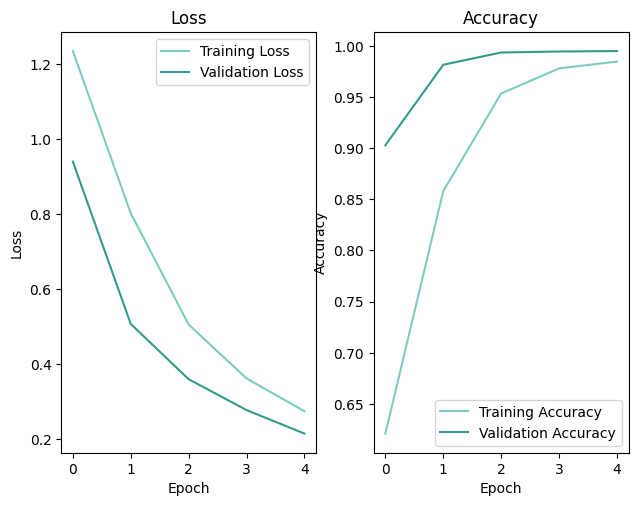

In [ ]:
#Plotting ISOT performance
plot_performance(history_ISOT)

281/281 [==============================] - 1s 2ms/step
Accuracy: 0.9956560481176209
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4695
           1       0.99      1.00      1.00      4283

    accuracy                           1.00      8978
   macro avg       1.00      1.00      1.00      8978
weighted avg       1.00      1.00      1.00      8978

CPU times: user 954 ms, sys: 95.2 ms, total: 1.05 s
Wall time: 1.5 s


<Axes: xlabel='Predicted', ylabel='Actual'>

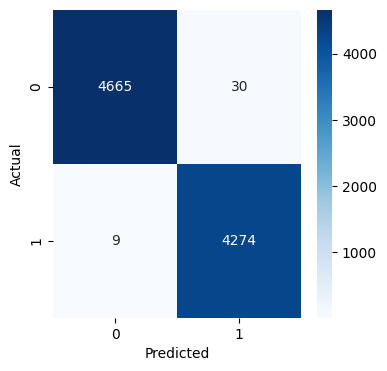

In [ ]:
%%time
#Plotting the performance on test set
y_pred = basic_model_ISOT.predict(X_test)
y_pred = [1 if x[0] > 0.5 else 0 for x in y_pred]

print("Accuracy:", accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

confusion_matrix_m = confusion_matrix(y_test, y_pred)

confusion_matrix_m = pd.DataFrame(confusion_matrix_m, index=[0,1], columns=[0,1])
confusion_matrix_m.index.name = 'Actual'
confusion_matrix_m.columns.name = 'Predicted'

plt.figure(figsize = (4,4))
sns.heatmap(confusion_matrix_m, cmap= "Blues",annot = True, fmt='')

###Basic NN - Saving models

In [ ]:
#Saving model - WELFake
basic_model_WELFake.save(file_name_model_basic_WELFake)

#Saving model - ISOT
basic_model_ISOT.save(file_name_model_basic_ISOT)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


###Basic NN - Loading models


In [ ]:
#Loading model - WELFake
basic_model_WELFake = load_model(file_name_model_basic_WELFake, custom_objects=None, compile=True, safe_mode=True)

#Loading model - ISOT
basic_model_ISOT = load_model(file_name_model_basic_ISOT, custom_objects=None, compile=True, safe_mode=True)

###LSTM - Training models

#### About WELFake

In [ ]:
%%time
#Convert list-of-strings data to NumPy arrays of integer indices - WELFake
batch_size = 1000
X_train = []
for i in range(0, len(X_train_WELFake), batch_size):
    batch = X_train_WELFake[i:i+batch_size]
    X_train.append(vectorizer_WELFake(np.array([[s] for s in batch])).numpy())
X_train = np.concatenate(X_train, axis=0)

X_val = []
for i in range(0, len(X_validation_WELFake), batch_size):
    batch = X_validation_WELFake[i:i+batch_size]
    X_val.append(vectorizer_WELFake(np.array([[s] for s in batch])).numpy())
X_val = np.concatenate(X_val, axis=0)

X_test = []
for i in range(0, len(X_test_WELFake), batch_size):
    batch = X_test_WELFake[i:i+batch_size]
    X_test.append(vectorizer_WELFake(np.array([[s] for s in batch])).numpy())
X_test = np.concatenate(X_test, axis=0)

y_train =  np.array(y_train_WELFake)
y_val = np.array(y_validation_WELFake)
y_test = np.array(y_test_WELFake)

CPU times: user 9.36 s, sys: 5.66 s, total: 15 s
Wall time: 15 s


In [ ]:
#Creation of the LSTM model - WELFake
int_sequences_input = keras.Input(shape=(None,), dtype="int32")
embedded_sequences = WELFake_embedding_layer(int_sequences_input)
x = layers.LSTM(32, dropout=0.2, recurrent_dropout=0.2)(embedded_sequences)
x = Dropout(0.2)(x)
preds = layers.Dense(1, activation='sigmoid')(x)

lstm_model_WELFake = keras.Model(int_sequences_input, preds)

optimizer = keras.optimizers.Adam(learning_rate=0.0001)
lstm_model_WELFake.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
#Summary of the LSTM model - WELFake
lstm_model_WELFake.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding (Embedding)       (None, None, 100)         1000200   
                                                                 
 lstm (LSTM)                 (None, 32)                17024     
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1017257 (3.88 MB)
Trainable params: 17057 (66.63 KB)
Non-trainable params: 1000200 (3.82 MB)
_________________________________________________________________


In [ ]:
%%time
#LSTM model training - WELFake
history_WELFake = lstm_model_WELFake.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/5
722/722 [==============================] - 230s 313ms/step - loss: 0.6668 - accuracy: 0.5812 - val_loss: 0.5371 - val_accuracy: 0.7646
Epoch 2/5
722/722 [==============================] - 220s 305ms/step - loss: 0.5049 - accuracy: 0.7926 - val_loss: 0.4761 - val_accuracy: 0.8132
Epoch 3/5
722/722 [==============================] - 220s 305ms/step - loss: 0.4811 - accuracy: 0.8089 - val_loss: 0.4721 - val_accuracy: 0.8092
Epoch 4/5
722/722 [==============================] - 220s 305ms/step - loss: 0.4958 - accuracy: 0.8020 - val_loss: 0.4531 - val_accuracy: 0.8276
Epoch 5/5
722/722 [==============================] - 221s 306ms/step - loss: 0.4700 - accuracy: 0.8176 - val_loss: 0.5545 - val_accuracy: 0.7503
CPU times: user 23min 59s, sys: 2min 4s, total: 26min 3s
Wall time: 18min 32s


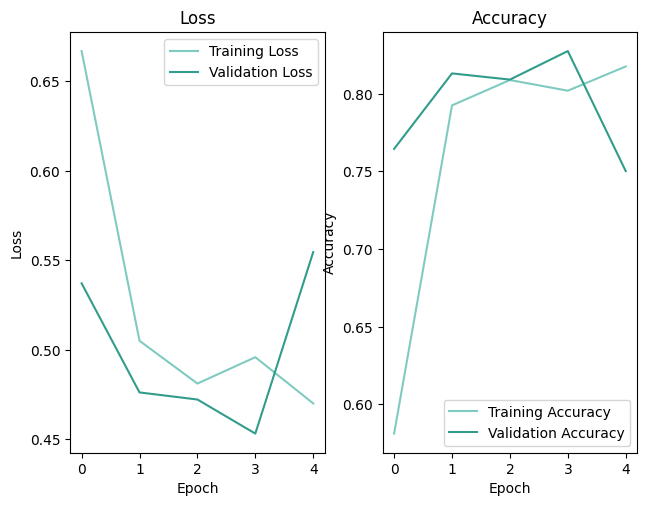

In [ ]:
#Plotting WELFake performance
plot_performance(history_WELFake)

451/451 [==============================] - 15s 32ms/step
Accuracy: 0.7527038269550749
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.97      0.80      7418
           1       0.94      0.52      0.67      7006

    accuracy                           0.75     14424
   macro avg       0.81      0.75      0.74     14424
weighted avg       0.81      0.75      0.74     14424

CPU times: user 14.9 s, sys: 253 ms, total: 15.1 s
Wall time: 21.1 s


<Axes: xlabel='Predicted', ylabel='Actual'>

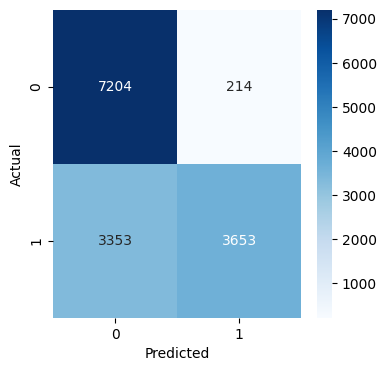

In [ ]:
%%time
#Plotting the performance on test set
y_pred = lstm_model_WELFake.predict(X_test)
y_pred = [1 if x[0] > 0.5 else 0 for x in y_pred]

print("Accuracy:", accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

confusion_matrix_m = confusion_matrix(y_test, y_pred)

confusion_matrix_m = pd.DataFrame(confusion_matrix_m, index=[0,1], columns=[0,1])
confusion_matrix_m.index.name = 'Actual'
confusion_matrix_m.columns.name = 'Predicted'

plt.figure(figsize = (4,4))
sns.heatmap(confusion_matrix_m, cmap= "Blues",annot = True, fmt='')

#### About ISOT

In [ ]:
#Convert list-of-strings data to NumPy arrays of integer indices - ISOT
batch_size = 1000
X_train = []
for i in range(0, len(X_train_ISOT), batch_size):
    batch = X_train_ISOT[i:i+batch_size]
    X_train.append(vectorizer_ISOT(np.array([[s] for s in batch])).numpy())
X_train = np.concatenate(X_train, axis=0)

X_val = []
for i in range(0, len(X_validation_ISOT), batch_size):
    batch = X_validation_ISOT[i:i+batch_size]
    X_val.append(vectorizer_ISOT(np.array([[s] for s in batch])).numpy())
X_val = np.concatenate(X_val, axis=0)

X_test = []
for i in range(0, len(X_test_ISOT), batch_size):
    batch = X_test_ISOT[i:i+batch_size]
    X_test.append(vectorizer_ISOT(np.array([[s] for s in batch])).numpy())
X_test = np.concatenate(X_test, axis=0)

y_train =  np.array(y_train_ISOT)
y_val = np.array(y_validation_ISOT)
y_test = np.array(y_test_ISOT)

In [ ]:
#Creation of the LSTM model - ISOT
int_sequences_input = keras.Input(shape=(None,), dtype="int32")
embedded_sequences = ISOT_embedding_layer(int_sequences_input)
x = layers.LSTM(64, dropout=0.2, recurrent_dropout=0.2)(embedded_sequences)
x = Dropout(0.2)(x)
preds = layers.Dense(1, activation='sigmoid')(x)

lstm_model_ISOT = keras.Model(int_sequences_input, preds)

optimizer = keras.optimizers.Adam(learning_rate=0.0001)
lstm_model_ISOT.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
#Summary of the LSTM model - ISOT
lstm_model_ISOT.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_1 (Embedding)     (None, None, 100)         1000200   
                                                                 
 lstm_1 (LSTM)               (None, 64)                42240     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1042505 (3.98 MB)
Trainable params: 42305 (165.25 KB)
Non-trainable params: 1000200 (3.82 MB)
_________________________________________________________________


In [ ]:
%%time
#LSTM model training - ISOT
history_ISOT = lstm_model_ISOT.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/5
449/449 [==============================] - 146s 312ms/step - loss: 0.4703 - accuracy: 0.7675 - val_loss: 0.4248 - val_accuracy: 0.8555
Epoch 2/5
449/449 [==============================] - 141s 315ms/step - loss: 0.3163 - accuracy: 0.8947 - val_loss: 0.2475 - val_accuracy: 0.9287
Epoch 3/5
449/449 [==============================] - 137s 306ms/step - loss: 0.2676 - accuracy: 0.9233 - val_loss: 0.2454 - val_accuracy: 0.9309
Epoch 4/5
449/449 [==============================] - 142s 316ms/step - loss: 0.2490 - accuracy: 0.9302 - val_loss: 0.2175 - val_accuracy: 0.9415
Epoch 5/5
449/449 [==============================] - 142s 316ms/step - loss: 0.2452 - accuracy: 0.9320 - val_loss: 0.2094 - val_accuracy: 0.9446
CPU times: user 15min 9s, sys: 1min 17s, total: 16min 26s
Wall time: 12min 27s


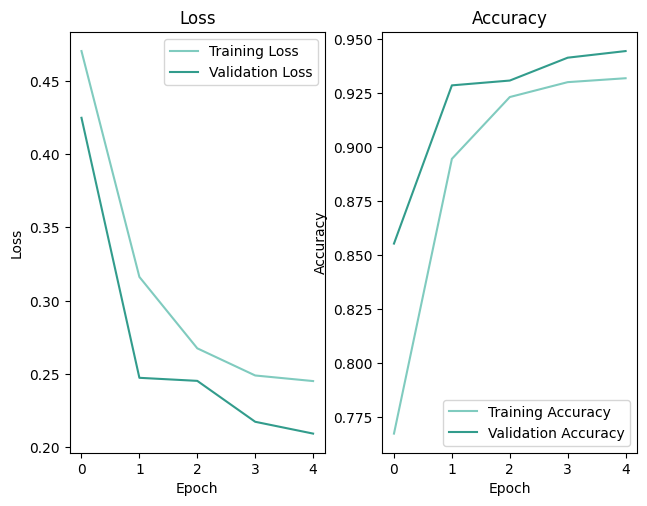

In [ ]:
#Plotting WELFake performance
plot_performance(history_ISOT)

281/281 [==============================] - 10s 33ms/step
Accuracy: 0.9474270438850524
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      4695
           1       0.93      0.96      0.95      4283

    accuracy                           0.95      8978
   macro avg       0.95      0.95      0.95      8978
weighted avg       0.95      0.95      0.95      8978

CPU times: user 9.69 s, sys: 172 ms, total: 9.86 s
Wall time: 9.84 s


<Axes: xlabel='Predicted', ylabel='Actual'>

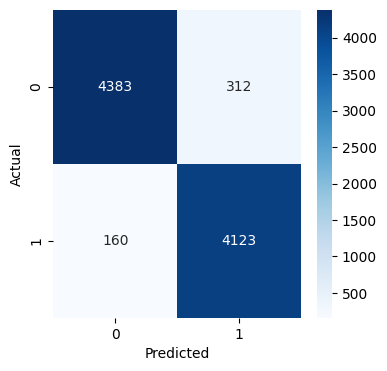

In [ ]:
%%time
#Plotting the performance on test set
y_pred = lstm_model_ISOT.predict(X_test)
y_pred = [1 if x[0] > 0.5 else 0 for x in y_pred]

print("Accuracy:", accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

confusion_matrix_m = confusion_matrix(y_test, y_pred)

confusion_matrix_m = pd.DataFrame(confusion_matrix_m, index=[0,1], columns=[0,1])
confusion_matrix_m.index.name = 'Actual'
confusion_matrix_m.columns.name = 'Predicted'

plt.figure(figsize = (4,4))
sns.heatmap(confusion_matrix_m, cmap= "Blues",annot = True, fmt='')

###LSTM - Saving models

In [ ]:
#Saving model - WELFake
lstm_model_WELFake.save(file_name_model_lstm_WELFake)

#Saving model - ISOT
lstm_model_ISOT.save(file_name_model_lstm_ISOT)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


###LSTM - Loading models

In [ ]:
#Loading model - WELFake
lstm_model_WELFake = load_model(file_name_model_lstm_WELFake, custom_objects=None, compile=True, safe_mode=True)

#Loading model - ISOT
lstm_model_ISOT = load_model(file_name_model_lstm_ISOT, custom_objects=None, compile=True, safe_mode=True)

###BI-LSTM - Training models



#### About WELFake

In [ ]:
%%time
#Convert list-of-strings data to NumPy arrays of integer indices - WELFake
batch_size = 1000
X_train = []
for i in range(0, len(X_train_WELFake), batch_size):
    batch = X_train_WELFake[i:i+batch_size]
    X_train.append(vectorizer_WELFake(np.array([[s] for s in batch])).numpy())
X_train = np.concatenate(X_train, axis=0)

X_val = []
for i in range(0, len(X_validation_WELFake), batch_size):
    batch = X_validation_WELFake[i:i+batch_size]
    X_val.append(vectorizer_WELFake(np.array([[s] for s in batch])).numpy())
X_val = np.concatenate(X_val, axis=0)

X_test = []
for i in range(0, len(X_test_WELFake), batch_size):
    batch = X_test_WELFake[i:i+batch_size]
    X_test.append(vectorizer_WELFake(np.array([[s] for s in batch])).numpy())
X_test = np.concatenate(X_test, axis=0)

y_train =  np.array(y_train_WELFake)
y_val = np.array(y_validation_WELFake)
y_test = np.array(y_test_WELFake)

CPU times: user 9.5 s, sys: 5.96 s, total: 15.5 s
Wall time: 15.5 s


In [ ]:
#Creation of the BI-LSTM model - WELFake
int_sequences_input = keras.Input(shape=(None,), dtype="int32")
embedded_sequences = WELFake_embedding_layer(int_sequences_input)
x = layers.Bidirectional(LSTM(200, dropout=0.2, recurrent_dropout=0.2))(embedded_sequences)
preds = layers.Dense(1, activation='sigmoid')(x)

model_bilstm_WELFake = keras.Model(int_sequences_input, preds)

optimizer = keras.optimizers.RMSprop(learning_rate=0.0001)
model_bilstm_WELFake.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#Summary of the BI-LSTM model - WELFake
model_bilstm_WELFake.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding (Embedding)       (None, None, 100)         1000200   
                                                                 
 bidirectional (Bidirection  (None, 400)               481600    
 al)                                                             
                                                                 
 dense_6 (Dense)             (None, 1)                 401       
                                                                 
Total params: 1482201 (5.65 MB)
Trainable params: 482001 (1.84 MB)
Non-trainable params: 1000200 (3.82 MB)
_________________________________________________________________


In [ ]:
%%time
#BI-LSTM model training - WELFake
history_WELFake = model_bilstm_WELFake.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/5
722/722 [==============================] - 443s 606ms/step - loss: 0.3590 - accuracy: 0.8448 - val_loss: 0.2735 - val_accuracy: 0.8873
Epoch 2/5
722/722 [==============================] - 438s 607ms/step - loss: 0.2421 - accuracy: 0.9024 - val_loss: 0.2368 - val_accuracy: 0.9076
Epoch 3/5
722/722 [==============================] - 424s 587ms/step - loss: 0.2070 - accuracy: 0.9200 - val_loss: 0.1946 - val_accuracy: 0.9218
Epoch 4/5
722/722 [==============================] - 418s 579ms/step - loss: 0.1809 - accuracy: 0.9309 - val_loss: 0.1809 - val_accuracy: 0.9317
Epoch 5/5
722/722 [==============================] - 421s 583ms/step - loss: 0.1639 - accuracy: 0.9375 - val_loss: 0.1689 - val_accuracy: 0.9352
CPU times: user 48min 48s, sys: 4min 24s, total: 53min 12s
Wall time: 35min 44s


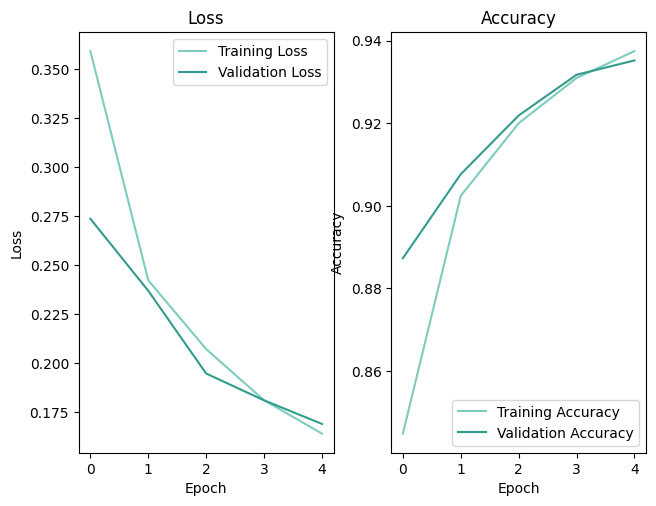

In [ ]:
#Plotting WELFake performance
plot_performance(history_WELFake)

451/451 [==============================] - 28s 61ms/step
Accuracy: 0.940099833610649
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7418
           1       0.98      0.90      0.94      7006

    accuracy                           0.94     14424
   macro avg       0.94      0.94      0.94     14424
weighted avg       0.94      0.94      0.94     14424

CPU times: user 27.9 s, sys: 362 ms, total: 28.2 s
Wall time: 41.6 s


<Axes: xlabel='Predicted', ylabel='Actual'>

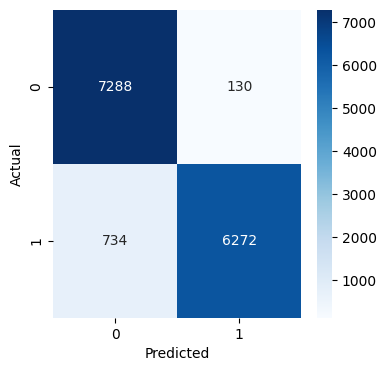

In [ ]:
%%time
#Plotting the performance on test set
y_pred = model_bilstm_WELFake.predict(X_test)
y_pred = [1 if x[0] > 0.5 else 0 for x in y_pred]

print("Accuracy:", accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

confusion_matrix_m = confusion_matrix(y_test, y_pred)

confusion_matrix_m = pd.DataFrame(confusion_matrix_m, index=[0,1], columns=[0,1])
confusion_matrix_m.index.name = 'Actual'
confusion_matrix_m.columns.name = 'Predicted'

plt.figure(figsize = (4,4))
sns.heatmap(confusion_matrix_m, cmap= "Blues",annot = True, fmt='')

#### About ISOT

In [ ]:
#Convert list-of-strings data to NumPy arrays of integer indices - ISOT
batch_size = 1000
X_train = []
for i in range(0, len(X_train_ISOT), batch_size):
    batch = X_train_ISOT[i:i+batch_size]
    X_train.append(vectorizer_ISOT(np.array([[s] for s in batch])).numpy())
X_train = np.concatenate(X_train, axis=0)

X_val = []
for i in range(0, len(X_validation_ISOT), batch_size):
    batch = X_validation_ISOT[i:i+batch_size]
    X_val.append(vectorizer_ISOT(np.array([[s] for s in batch])).numpy())
X_val = np.concatenate(X_val, axis=0)

X_test = []
for i in range(0, len(X_test_ISOT), batch_size):
    batch = X_test_ISOT[i:i+batch_size]
    X_test.append(vectorizer_ISOT(np.array([[s] for s in batch])).numpy())
X_test = np.concatenate(X_test, axis=0)

y_train =  np.array(y_train_ISOT)
y_val = np.array(y_validation_ISOT)
y_test = np.array(y_test_ISOT)

In [ ]:
#Creation of the BI-LSTM model - ISOT
int_sequences_input = keras.Input(shape=(None,), dtype="int32")
embedded_sequences = ISOT_embedding_layer(int_sequences_input)
x = layers.Bidirectional(LSTM(200, dropout=0.2, recurrent_dropout=0.2))(embedded_sequences)
preds = layers.Dense(1, activation='sigmoid')(x)

model_bilstm_ISOT = keras.Model(int_sequences_input, preds)

optimizer = keras.optimizers.RMSprop(learning_rate=0.0001)
model_bilstm_ISOT.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#Summary of the BI-LSTM model - ISOT
model_bilstm_ISOT.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_1 (Embedding)     (None, None, 100)         1000200   
                                                                 
 bidirectional_1 (Bidirecti  (None, 400)               481600    
 onal)                                                           
                                                                 
 dense_7 (Dense)             (None, 1)                 401       
                                                                 
Total params: 1482201 (5.65 MB)
Trainable params: 482001 (1.84 MB)
Non-trainable params: 1000200 (3.82 MB)
_________________________________________________________________


In [ ]:
%%time
#BI-LSTM model training - WELFake
history_ISOT = model_bilstm_ISOT.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/5
449/449 [==============================] - 272s 594ms/step - loss: 0.1771 - accuracy: 0.9418 - val_loss: 0.0502 - val_accuracy: 0.9847
Epoch 2/5
449/449 [==============================] - 271s 603ms/step - loss: 0.0393 - accuracy: 0.9875 - val_loss: 0.0218 - val_accuracy: 0.9939
Epoch 3/5
449/449 [==============================] - 280s 624ms/step - loss: 0.0198 - accuracy: 0.9936 - val_loss: 0.0182 - val_accuracy: 0.9948
Epoch 4/5
449/449 [==============================] - 271s 604ms/step - loss: 0.0141 - accuracy: 0.9960 - val_loss: 0.0173 - val_accuracy: 0.9954
Epoch 5/5
449/449 [==============================] - 270s 601ms/step - loss: 0.0113 - accuracy: 0.9969 - val_loss: 0.0150 - val_accuracy: 0.9969
CPU times: user 30min 47s, sys: 2min 46s, total: 33min 33s
Wall time: 23min 26s


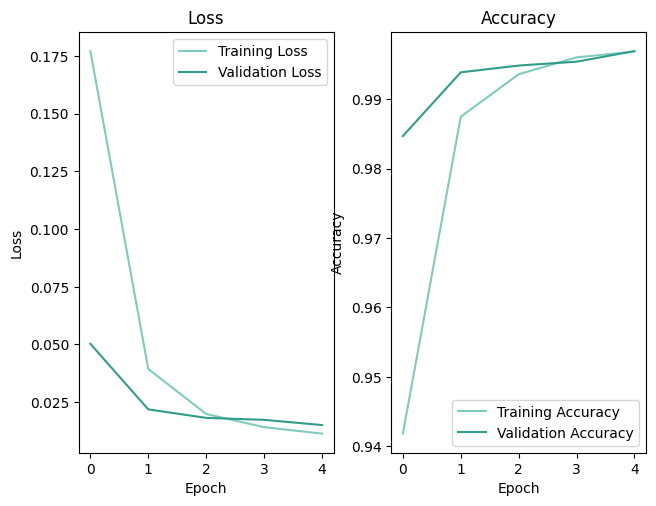

In [ ]:
#Plotting WELFake performance
plot_performance(history_ISOT)

281/281 [==============================] - 18s 64ms/step
Accuracy: 0.9981064825128091
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4695
           1       1.00      1.00      1.00      4283

    accuracy                           1.00      8978
   macro avg       1.00      1.00      1.00      8978
weighted avg       1.00      1.00      1.00      8978

CPU times: user 18.3 s, sys: 242 ms, total: 18.5 s
Wall time: 21.1 s


<Axes: xlabel='Predicted', ylabel='Actual'>

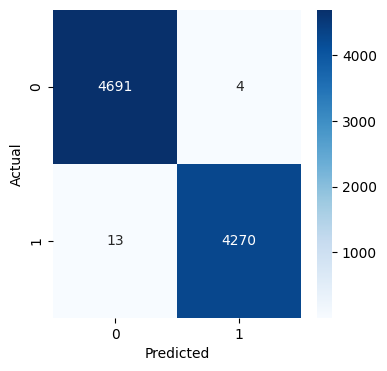

In [ ]:
%%time
#Plotting the performance on test set
y_pred = model_bilstm_ISOT.predict(X_test)
y_pred = [1 if x[0] > 0.5 else 0 for x in y_pred]

print("Accuracy:", accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

confusion_matrix_m = confusion_matrix(y_test, y_pred)

confusion_matrix_m = pd.DataFrame(confusion_matrix_m, index=[0,1], columns=[0,1])
confusion_matrix_m.index.name = 'Actual'
confusion_matrix_m.columns.name = 'Predicted'

plt.figure(figsize = (4,4))
sns.heatmap(confusion_matrix_m, cmap= "Blues",annot = True, fmt='')

###BI-LSTM - Saving models

In [ ]:
#Saving model - WELFake
model_bilstm_WELFake.save(file_name_model_bi_lstm_WELFake)

#Saving model - ISOT
model_bilstm_ISOT.save(file_name_model_bi_lstm_ISOT)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


###BI-LSTM - Loading models

In [ ]:
#Loading model - WELFake
model_bilstm_WELFake = load_model(file_name_model_bi_lstm_WELFake, custom_objects=None, compile=True, safe_mode=True)

#Loading model - ISOT
model_bilstm_ISOT = load_model(file_name_model_bi_lstm_ISOT, custom_objects=None, compile=True, safe_mode=True)

## Models with wordpiece

### Loading preprocess datasets


In [ ]:
#Loading preprocess datasets without tokenizatior and/or lemmatization

#Loading WELFake preprocessed
preprocessed_WELFake_dataset = pd.read_csv(file_name_preprocessed_WELFake_dataset_NO_lemmatization)

#Loading ISOT preprocessed
preprocessed_ISOT_dataset = pd.read_csv(file_name_preprocessed_ISOT_dataset_NO_lemmatization)

###Train, validation & test split

In [ ]:
%%time
#Split WELFake dataset
X_train_WELFake, X_test_WELFake, y_train_WELFake, y_test_WELFake = train_test_split(
    preprocessed_WELFake_dataset["text"].astype(str),
    preprocessed_WELFake_dataset["label"],
    stratify=preprocessed_WELFake_dataset["label"],
    test_size=0.2,
    random_state=42)

X_train_WELFake, X_validation_WELFake, y_train_WELFake, y_validation_WELFake = train_test_split(
    X_train_WELFake, y_train_WELFake,
    stratify=y_train_WELFake,
    test_size=0.2,
    random_state=42
)

CPU times: user 86.2 ms, sys: 4.84 ms, total: 91 ms
Wall time: 250 ms


In [ ]:
%%time
#Split ISOT dataset
X_train_ISOT, X_test_ISOT, y_train_ISOT, y_test_ISOT = train_test_split(
    preprocessed_ISOT_dataset["text"].astype(str),
    preprocessed_ISOT_dataset["label"],
    stratify=preprocessed_ISOT_dataset["label"],
    test_size=0.2,
    random_state=42)

X_train_ISOT, X_validation_ISOT, y_train_ISOT, y_validation_ISOT = train_test_split(
    X_train_ISOT, y_train_ISOT,
    stratify=y_train_ISOT,
    test_size=0.2,
    random_state=42
)

CPU times: user 46 ms, sys: 966 µs, total: 46.9 ms
Wall time: 76.4 ms


###BERT - Training models

In [ ]:
#Build the model

def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string)
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess)
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True)
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(1, activation="sigmoid")(net)

  return tf.keras.Model(text_input, net)

#### About WELFake

In [ ]:
#Some parameters - WELFake
X_train=X_train_WELFake
y_train=y_train_WELFake
X_val=X_validation_WELFake
y_val=y_validation_WELFake
X_test=X_test_WELFake
y_test=y_test_WELFake

epochs = 5
steps_per_epoch = tf.data.experimental.cardinality(tf.data.Dataset.from_tensor_slices(X_train_ISOT)).numpy()
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

In [ ]:
#Creation of the model - WELFake
BERT_model_WELFake = build_classifier_model()

init_lr = 3e-5
optimizer_WELFake = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')
BERT_model_WELFake.compile(optimizer=optimizer_WELFake, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#Summary of the BERT model - WELFake
BERT_model_WELFake.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None,)]                    0         []                            
                                                                                                  
 keras_layer (KerasLayer)    {'input_word_ids': (None,    0         ['input_1[0][0]']             
                             128),                                                                
                              'input_type_ids': (None,                                            
                             128),                                                                
                              'input_mask': (None, 128)                                           
                             }                                                                

In [ ]:
%%time
#BERT model training - WELFake
history_WELFake = BERT_model_WELFake.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/5
722/722 [==============================] - 425s 571ms/step - loss: 0.6263 - accuracy: 0.6642 - val_loss: 0.3947 - val_accuracy: 0.8348
Epoch 2/5
722/722 [==============================] - 440s 610ms/step - loss: 0.2550 - accuracy: 0.8994 - val_loss: 0.1677 - val_accuracy: 0.9353
Epoch 3/5
722/722 [==============================] - 440s 610ms/step - loss: 0.1519 - accuracy: 0.9428 - val_loss: 0.1340 - val_accuracy: 0.9473
Epoch 4/5
722/722 [==============================] - 440s 609ms/step - loss: 0.1202 - accuracy: 0.9543 - val_loss: 0.1185 - val_accuracy: 0.9564
Epoch 5/5
722/722 [==============================] - 440s 609ms/step - loss: 0.0976 - accuracy: 0.9643 - val_loss: 0.0946 - val_accuracy: 0.9655
CPU times: user 31min 32s, sys: 3min 48s, total: 35min 20s
Wall time: 36min 29s


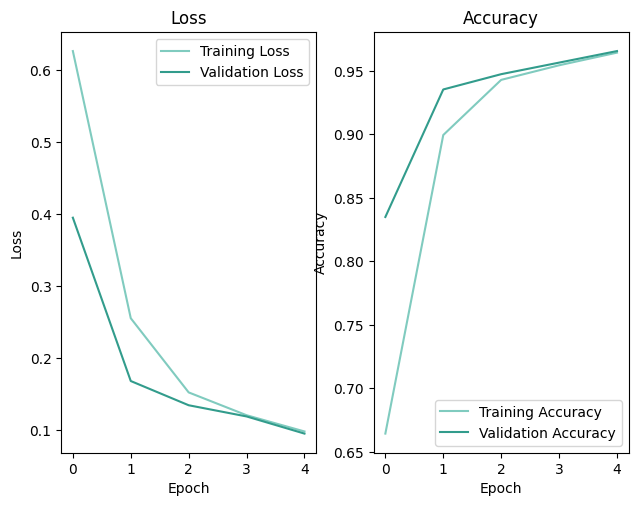

In [ ]:
#Plotting WELFake performance
plot_performance(history_WELFake)

451/451 [==============================] - 51s 113ms/step
Accuracy: 0.9665834719911259
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      7418
           1       0.97      0.96      0.97      7006

    accuracy                           0.97     14424
   macro avg       0.97      0.97      0.97     14424
weighted avg       0.97      0.97      0.97     14424

CPU times: user 59.8 s, sys: 6.06 s, total: 1min 5s
Wall time: 52 s


<Axes: xlabel='Predicted', ylabel='Actual'>

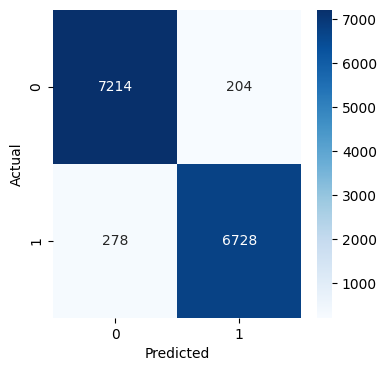

In [ ]:
%%time
#Plotting the performance on test set
y_pred = BERT_model_WELFake.predict(X_test)
y_pred = [1 if x[0] > 0.5 else 0 for x in y_pred]

print("Accuracy:", accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

confusion_matrix_m = confusion_matrix(y_test, y_pred)

confusion_matrix_m = pd.DataFrame(confusion_matrix_m, index=[0,1], columns=[0,1])
confusion_matrix_m.index.name = 'Actual'
confusion_matrix_m.columns.name = 'Predicted'

plt.figure(figsize = (4,4))
sns.heatmap(confusion_matrix_m, cmap= "Blues",annot = True, fmt='')

#### About ISOT

In [ ]:
#Some parameters - ISOT
X_train=X_train_ISOT
y_train=y_train_ISOT
X_val=X_validation_ISOT
y_val=y_validation_ISOT
X_test=X_test_ISOT
y_test=y_test_ISOT

epochs = 5
steps_per_epoch = tf.data.experimental.cardinality(tf.data.Dataset.from_tensor_slices(X_train_ISOT)).numpy()
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

In [ ]:
#Creation of the model - ISOT
BERT_model_ISOT = build_classifier_model()

init_lr = 3e-5
optimizer_ISOT = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')
BERT_model_ISOT.compile(optimizer=optimizer_ISOT, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#Summary of the BERT model - ISOT
BERT_model_ISOT.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None,)]                    0         []                            
                                                                                                  
 keras_layer_2 (KerasLayer)  {'input_word_ids': (None,    0         ['input_2[0][0]']             
                             128),                                                                
                              'input_type_ids': (None,                                            
                             128),                                                                
                              'input_mask': (None, 128)                                           
                             }                                                              

In [ ]:
%%time
#BERT model training - ISOT
history_ISOT = BERT_model_ISOT.fit(X_train, y_train, epochs=epochs, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/5
449/449 [==============================] - 266s 580ms/step - loss: 0.6109 - accuracy: 0.6537 - val_loss: 0.3549 - val_accuracy: 0.8659
Epoch 2/5
449/449 [==============================] - 260s 579ms/step - loss: 0.2287 - accuracy: 0.9162 - val_loss: 0.0215 - val_accuracy: 0.9965
Epoch 3/5
449/449 [==============================] - 260s 580ms/step - loss: 0.0167 - accuracy: 0.9966 - val_loss: 0.0142 - val_accuracy: 0.9972
Epoch 4/5
449/449 [==============================] - 265s 589ms/step - loss: 0.0107 - accuracy: 0.9977 - val_loss: 0.0120 - val_accuracy: 0.9979
Epoch 5/5
449/449 [==============================] - 259s 578ms/step - loss: 0.0083 - accuracy: 0.9981 - val_loss: 0.0115 - val_accuracy: 0.9981
CPU times: user 19min 9s, sys: 2min 19s, total: 21min 29s
Wall time: 21min 50s


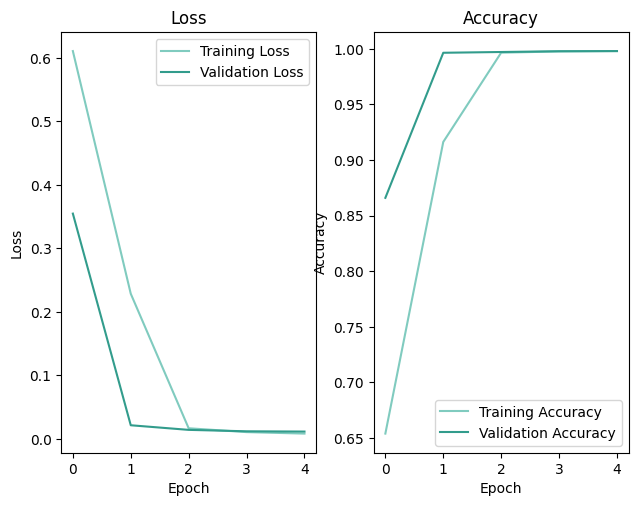

In [ ]:
#Plotting ISOT performance
plot_performance(history_ISOT)

281/281 [==============================] - 31s 110ms/step
Accuracy: 0.9984406326576075
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4695
           1       1.00      1.00      1.00      4283

    accuracy                           1.00      8978
   macro avg       1.00      1.00      1.00      8978
weighted avg       1.00      1.00      1.00      8978

CPU times: user 36 s, sys: 3.7 s, total: 39.7 s
Wall time: 31.7 s


<Axes: xlabel='Predicted', ylabel='Actual'>

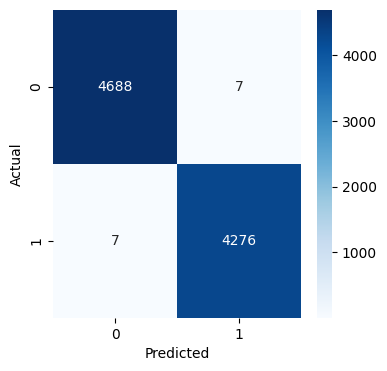

In [ ]:
%%time
#Plotting the performance on test set
y_pred = BERT_model_ISOT.predict(X_test)
y_pred = [1 if x[0] > 0.5 else 0 for x in y_pred]

print("Accuracy:", accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

confusion_matrix_m = confusion_matrix(y_test, y_pred)

confusion_matrix_m = pd.DataFrame(confusion_matrix_m, index=[0,1], columns=[0,1])
confusion_matrix_m.index.name = 'Actual'
confusion_matrix_m.columns.name = 'Predicted'

plt.figure(figsize = (4,4))
sns.heatmap(confusion_matrix_m, cmap= "Blues",annot = True, fmt='')

### BERT - Saving models

In [ ]:
#Saving model - WELFake
BERT_model_WELFake.save(file_name_model_bert_WELFake)

#Saving model - ISOT
BERT_model_ISOT.save(file_name_model_bert_ISOT)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### BERT - Loading models

In [ ]:
#Loading model - WELFake
BERT_model_WELFake = tf.keras.models.load_model(file_name_model_bert_WELFake, custom_objects={'KerasLayer':hub.KerasLayer, 'optimizer':optimizer_WELFake}, compile=False)

#Loading model - ISOT
BERT_model_ISOT = load_model(file_name_model_bert_ISOT, custom_objects={'KerasLayer':hub.KerasLayer, 'optimizer':optimizer_ISOT}, compile=False)

## Distillation of the best

###Loading preprocess datasets

In [ ]:
#Loading preprocess datasets without tokenizatior and/or lemmatization

#Loading WELFake preprocessed
preprocessed_WELFake_dataset = pd.read_csv(file_name_preprocessed_WELFake_dataset_NO_lemmatization)

#Loading ISOT preprocessed
preprocessed_ISOT_dataset = pd.read_csv(file_name_preprocessed_ISOT_dataset_NO_lemmatization)

###Train, validation and test split

In [ ]:
%%time
#Split WELFake dataset
X_train_WELFake, X_test_WELFake, y_train_WELFake, y_test_WELFake = train_test_split(
    preprocessed_WELFake_dataset["text"].astype(str),
    preprocessed_WELFake_dataset["label"],
    stratify=preprocessed_WELFake_dataset["label"],
    test_size=0.2,
    random_state=42)

X_train_WELFake, X_validation_WELFake, y_train_WELFake, y_validation_WELFake = train_test_split(
    X_train_WELFake, y_train_WELFake,
    stratify=y_train_WELFake,
    test_size=0.2,
    random_state=42
)

CPU times: user 51.2 ms, sys: 0 ns, total: 51.2 ms
Wall time: 51.1 ms


In [ ]:
%%time
#Split ISOT dataset
X_train_ISOT, X_test_ISOT, y_train_ISOT, y_test_ISOT = train_test_split(
    preprocessed_ISOT_dataset["text"].astype(str),
    preprocessed_ISOT_dataset["label"],
    stratify=preprocessed_ISOT_dataset["label"],
    test_size=0.2,
    random_state=42)

X_train_ISOT, X_validation_ISOT, y_train_ISOT, y_validation_ISOT = train_test_split(
    X_train_ISOT, y_train_ISOT,
    stratify=y_train_ISOT,
    test_size=0.2,
    random_state=42
)

CPU times: user 28.4 ms, sys: 0 ns, total: 28.4 ms
Wall time: 28.6 ms


### STUDENT - Training models without a teacher

In [ ]:
#Build the model
def build_student_model(vectorize_layer):
  model = Sequential([
      Input(shape=(1,), dtype=tf.string),
      vectorize_layer,
      Embedding(input_dim=100, output_dim=40, input_length=40),
      Conv1D(16, 5, activation='relu'),
      GlobalMaxPooling1D(),
      Dropout(0.5),
      Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
      Dense(1, activation='sigmoid')
  ])
  return model

#### About WELFake

In [ ]:
#Some parameters - WELFake
X_train=X_train_WELFake
y_train=y_train_WELFake
X_val=X_validation_WELFake
y_val=y_validation_WELFake
X_test=X_test_WELFake
y_test=y_test_WELFake

vectorize_layer = TextVectorization(max_tokens=100, output_mode='int', output_sequence_length=40)
vectorize_layer.adapt(X_train)

In [ ]:
#Creation of the model - WELFake
student_model_WELFake = build_student_model(vectorize_layer)

optimizer = keras.optimizers.Adam(learning_rate=0.0001)
student_model_WELFake.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#Summary of the STUDENT model - WELFake
student_model_WELFake.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 40)                0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 40, 40)            4000      
                                                                 
 conv1d (Conv1D)             (None, 36, 16)            3216      
                                                                 
 global_max_pooling1d (Glob  (None, 16)                0         
 alMaxPooling1D)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 1

In [ ]:
%%time
#STUDENT model training - WELFake
history_WELFake = student_model_WELFake.fit(X_train, y_train, epochs=epochs, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/5
722/722 [==============================] - 14s 14ms/step - loss: 0.7168 - accuracy: 0.6892 - val_loss: 0.5998 - val_accuracy: 0.8685
Epoch 2/5
722/722 [==============================] - 6s 9ms/step - loss: 0.5349 - accuracy: 0.8707 - val_loss: 0.4809 - val_accuracy: 0.8737
Epoch 3/5
722/722 [==============================] - 7s 10ms/step - loss: 0.4515 - accuracy: 0.8817 - val_loss: 0.3957 - val_accuracy: 0.8858
Epoch 4/5
722/722 [==============================] - 6s 8ms/step - loss: 0.3878 - accuracy: 0.8882 - val_loss: 0.3369 - val_accuracy: 0.8907
Epoch 5/5
722/722 [==============================] - 7s 10ms/step - loss: 0.3470 - accuracy: 0.8915 - val_loss: 0.3079 - val_accuracy: 0.8916
CPU times: user 43.3 s, sys: 2.63 s, total: 45.9 s
Wall time: 41.9 s


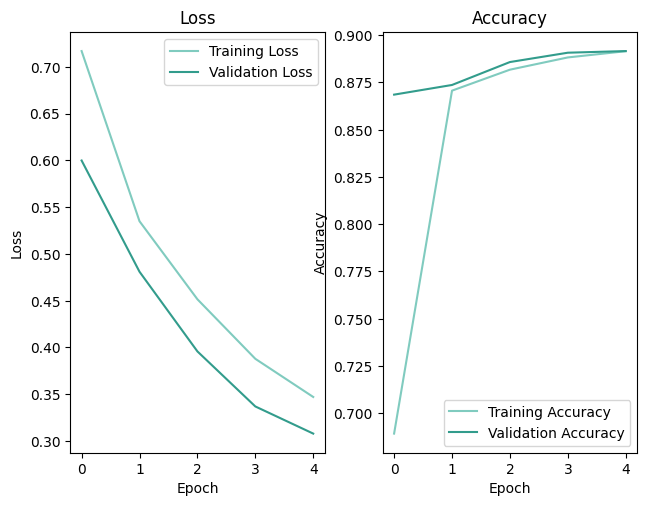

In [ ]:
#Plotting WELFake performance
plot_performance(history_WELFake)

451/451 [==============================] - 2s 3ms/step
Accuracy: 0.8980171935662784
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.98      0.91      7418
           1       0.98      0.81      0.88      7006

    accuracy                           0.90     14424
   macro avg       0.91      0.90      0.90     14424
weighted avg       0.91      0.90      0.90     14424

CPU times: user 2.46 s, sys: 164 ms, total: 2.62 s
Wall time: 2.84 s


<Axes: xlabel='Predicted', ylabel='Actual'>

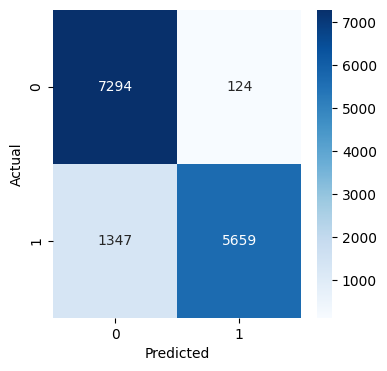

In [ ]:
%%time
#Plotting the performance on test set
y_pred = student_model_WELFake.predict(X_test)
y_pred = [1 if x[0] > 0.5 else 0 for x in y_pred]

print("Accuracy:", accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

confusion_matrix_m = confusion_matrix(y_test, y_pred)

confusion_matrix_m = pd.DataFrame(confusion_matrix_m, index=[0,1], columns=[0,1])
confusion_matrix_m.index.name = 'Actual'
confusion_matrix_m.columns.name = 'Predicted'

plt.figure(figsize = (4,4))
sns.heatmap(confusion_matrix_m, cmap= "Blues",annot = True, fmt='')

#### About ISOT

In [ ]:
#Some parameters - ISOT
X_train=X_train_ISOT
y_train=y_train_ISOT
X_val=X_validation_ISOT
y_val=y_validation_ISOT
X_test=X_test_ISOT
y_test=y_test_ISOT

vectorize_layer = TextVectorization(max_tokens=100, output_mode='int', output_sequence_length=40)
vectorize_layer.adapt(X_train)

In [ ]:
#Creation of the model - ISOT
student_model_ISOT = build_student_model(vectorize_layer)

optimizer = keras.optimizers.Adam(learning_rate=0.0001)
student_model_ISOT.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#Summary of the STUDENT model - ISOT
student_model_ISOT.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (Text  (None, 40)                0         
 Vectorization)                                                  
                                                                 
 embedding_1 (Embedding)     (None, 40, 40)            4000      
                                                                 
 conv1d_1 (Conv1D)           (None, 36, 16)            3216      
                                                                 
 global_max_pooling1d_1 (Gl  (None, 16)                0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_4 (Dense)             (None, 8)                

In [ ]:
%%time
#STUDENT model training - ISOT
history_ISOT = student_model_ISOT.fit(X_train, y_train, epochs=epochs, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/5
449/449 [==============================] - 6s 11ms/step - loss: 0.7317 - accuracy: 0.7919 - val_loss: 0.5949 - val_accuracy: 0.9954
Epoch 2/5
449/449 [==============================] - 5s 10ms/step - loss: 0.4413 - accuracy: 0.9725 - val_loss: 0.2411 - val_accuracy: 0.9971
Epoch 3/5
449/449 [==============================] - 4s 8ms/step - loss: 0.2347 - accuracy: 0.9840 - val_loss: 0.1354 - val_accuracy: 0.9971
Epoch 4/5
449/449 [==============================] - 3s 7ms/step - loss: 0.1699 - accuracy: 0.9880 - val_loss: 0.1078 - val_accuracy: 0.9971
Epoch 5/5
449/449 [==============================] - 3s 7ms/step - loss: 0.1398 - accuracy: 0.9900 - val_loss: 0.0938 - val_accuracy: 0.9971
CPU times: user 24.7 s, sys: 1.61 s, total: 26.4 s
Wall time: 21.4 s


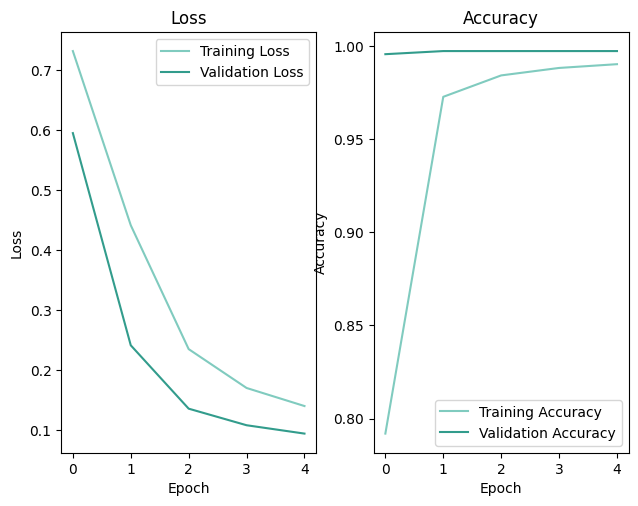

In [ ]:
#Plotting ISOT performance
plot_performance(history_ISOT)

281/281 [==============================] - 1s 5ms/step
Accuracy: 0.9979950991312097
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4695
           1       1.00      1.00      1.00      4283

    accuracy                           1.00      8978
   macro avg       1.00      1.00      1.00      8978
weighted avg       1.00      1.00      1.00      8978

CPU times: user 1.77 s, sys: 115 ms, total: 1.88 s
Wall time: 1.96 s


<Axes: xlabel='Predicted', ylabel='Actual'>

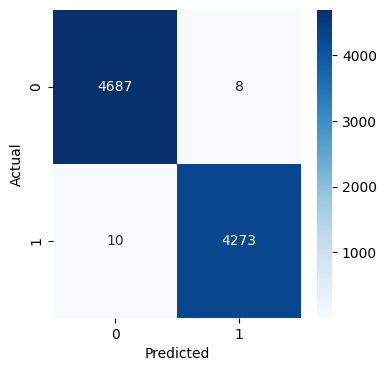

In [ ]:
%%time
#Plotting the performance on test set
y_pred = student_model_ISOT.predict(X_test)
y_pred = [1 if x[0] > 0.5 else 0 for x in y_pred]

print("Accuracy:", accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

confusion_matrix_m = confusion_matrix(y_test, y_pred)

confusion_matrix_m = pd.DataFrame(confusion_matrix_m, index=[0,1], columns=[0,1])
confusion_matrix_m.index.name = 'Actual'
confusion_matrix_m.columns.name = 'Predicted'

plt.figure(figsize = (4,4))
sns.heatmap(confusion_matrix_m, cmap= "Blues",annot = True, fmt='')

### STUDENT - Training models with a teacher

In [ ]:
#Creating a class to distill based on the class recommended by keras

class Distiller(keras.Model):
    def __init__(self, student, teacher):
        super(Distiller, self).__init__()
        self.teacher = teacher
        self.student = student

    def compile(
        self,
        optimizer,
        metrics,
        student_loss_fn,
        distillation_loss_fn,
        alpha=0.4,
        temperature=3,
    ):

        super(Distiller, self).compile(optimizer=optimizer, metrics=metrics)
        self.student_loss_fn = student_loss_fn
        self.distillation_loss_fn = distillation_loss_fn
        self.alpha = alpha
        self.temperature = temperature

    def train_step(self, data):
        x, y = data
        teacher_predictions = self.teacher(x, training=False)

        with tf.GradientTape() as tape:
            student_predictions = self.student(x, training=True)

            student_loss = self.student_loss_fn(y, student_predictions)
            distillation_loss = self.distillation_loss_fn(teacher_predictions,student_predictions)
            loss = self.alpha * student_loss + (1 - self.alpha) * distillation_loss #custom loss function

        trainable_vars = self.student.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)

        self.optimizer.apply_gradients(zip(gradients, trainable_vars))

        self.compiled_metrics.update_state(y, student_predictions)

        results = {m.name: m.result() for m in self.metrics}
        results.update(
            {"student_loss": student_loss, "distillation_loss": distillation_loss}
        )
        return results

    def test_step(self, data):
        x, y = data
        y_prediction = self.student(x, training=False)

        student_loss = self.student_loss_fn(y, y_prediction)

        self.compiled_metrics.update_state(y, y_prediction)

        results = {m.name: m.result() for m in self.metrics}
        results.update({"student_loss": student_loss})
        return results

#### About WELFake

In [ ]:
#Some parameters - WELFake
X_train=X_train_WELFake
y_train=y_train_WELFake
X_val=X_validation_WELFake
y_val=y_validation_WELFake
X_test=X_test_WELFake
y_test=y_test_WELFake

vectorize_layer = TextVectorization(max_tokens=100, output_mode='int', output_sequence_length=40)
vectorize_layer.adapt(X_train)

In [ ]:
#Creation of the model - WELFake
student_model_WELFake = build_student_model(vectorize_layer)

optimizer = keras.optimizers.Adam(learning_rate=0.0001)
student_model_WELFake.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#Summary of the STUDENT model - WELFake
student_model_WELFake.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_2 (Text  (None, 40)                0         
 Vectorization)                                                  
                                                                 
 embedding_2 (Embedding)     (None, 40, 40)            4000      
                                                                 
 conv1d_2 (Conv1D)           (None, 36, 16)            3216      
                                                                 
 global_max_pooling1d_2 (Gl  (None, 16)                0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_4 (Dropout)         (None, 16)                0         
                                                                 
 dense_6 (Dense)             (None, 8)                

In [ ]:
student = student_model_WELFake
teacher = BERT_model_WELFake
distiller = Distiller(student=student, teacher=teacher)
distiller.compile(
    optimizer=keras.optimizers.Adam(0.0001),
    metrics=['accuracy'],
    student_loss_fn=keras.losses.BinaryCrossentropy(),
    distillation_loss_fn=keras.losses.BinaryCrossentropy()
    )

In [ ]:
%%time
#Distill teacher to student
history_WELFake = distiller.fit(X_train, y_train, batch_size=64, epochs=5, validation_data=(X_val, y_val))

Epoch 1/5
722/722 [==============================] - 222s 303ms/step - accuracy: 0.7333 - student_loss: 0.6432 - distillation_loss: 0.6430 - val_accuracy: 0.8811 - val_student_loss: 0.4570
Epoch 2/5
722/722 [==============================] - 217s 301ms/step - accuracy: 0.8730 - student_loss: 0.3847 - distillation_loss: 0.3840 - val_accuracy: 0.8825 - val_student_loss: 0.2131
Epoch 3/5
722/722 [==============================] - 218s 301ms/step - accuracy: 0.8831 - student_loss: 0.3088 - distillation_loss: 0.3061 - val_accuracy: 0.8871 - val_student_loss: 0.1914
Epoch 4/5
722/722 [==============================] - 218s 302ms/step - accuracy: 0.8877 - student_loss: 0.2964 - distillation_loss: 0.2929 - val_accuracy: 0.8909 - val_student_loss: 0.1850
Epoch 5/5
722/722 [==============================] - 216s 300ms/step - accuracy: 0.8899 - student_loss: 0.2884 - distillation_loss: 0.2854 - val_accuracy: 0.8944 - val_student_loss: 0.1801
CPU times: user 17min 8s, sys: 2min 46s, total: 19min 5

451/451 [==============================] - 4s 8ms/step
Accuracy: 0.9005130338325014
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      7418
           1       0.96      0.83      0.89      7006

    accuracy                           0.90     14424
   macro avg       0.91      0.90      0.90     14424
weighted avg       0.91      0.90      0.90     14424

CPU times: user 3.03 s, sys: 194 ms, total: 3.23 s
Wall time: 4.92 s


<Axes: xlabel='Predicted', ylabel='Actual'>

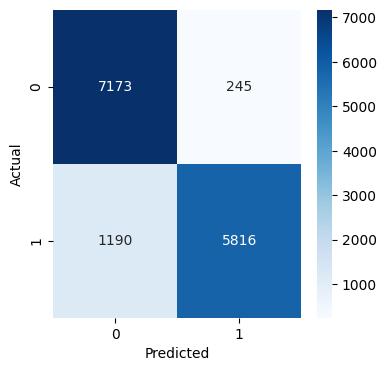

In [ ]:
%%time
#Plotting the performance on test set
y_pred = student_model_WELFake.predict(X_test)
y_pred = [1 if x[0] > 0.5 else 0 for x in y_pred]

print("Accuracy:", accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

confusion_matrix_m = confusion_matrix(y_test, y_pred)

confusion_matrix_m = pd.DataFrame(confusion_matrix_m, index=[0,1], columns=[0,1])
confusion_matrix_m.index.name = 'Actual'
confusion_matrix_m.columns.name = 'Predicted'

plt.figure(figsize = (4,4))
sns.heatmap(confusion_matrix_m, cmap= "Blues",annot = True, fmt='')

####About ISOT

In [ ]:
#Some parameters - ISOT
X_train=X_train_ISOT
y_train=y_train_ISOT
X_val=X_validation_ISOT
y_val=y_validation_ISOT
X_test=X_test_ISOT
y_test=y_test_ISOT

vectorize_layer = TextVectorization(max_tokens=100, output_mode='int', output_sequence_length=40)
vectorize_layer.adapt(X_train)

In [ ]:
#Creation of the model - ISOT
student_model_ISOT = build_student_model(vectorize_layer)

optimizer = keras.optimizers.Adam(learning_rate=0.0001)
student_model_ISOT.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#Summary of the STUDENT model - ISOT
student_model_ISOT.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_3 (Text  (None, 40)                0         
 Vectorization)                                                  
                                                                 
 embedding_3 (Embedding)     (None, 40, 40)            4000      
                                                                 
 conv1d_3 (Conv1D)           (None, 36, 16)            3216      
                                                                 
 global_max_pooling1d_3 (Gl  (None, 16)                0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_5 (Dropout)         (None, 16)                0         
                                                                 
 dense_8 (Dense)             (None, 8)                

In [ ]:
student = student_model_ISOT
teacher = BERT_model_ISOT
distiller = Distiller(student=student, teacher=teacher)
distiller.compile(
    optimizer=keras.optimizers.Adam(0.0001),
    metrics=['accuracy'],
    student_loss_fn=keras.losses.BinaryCrossentropy(),
    distillation_loss_fn=keras.losses.BinaryCrossentropy()
    )

In [ ]:
%%time
#Distill teacher to student
history_ISOT = distiller.fit(X_train, y_train, batch_size=64, epochs=5, validation_data=(X_val, y_val))

Epoch 1/5
449/449 [==============================] - 135s 293ms/step - accuracy: 0.6643 - student_loss: 0.6634 - distillation_loss: 0.6634 - val_accuracy: 0.9797 - val_student_loss: 0.5761
Epoch 2/5
449/449 [==============================] - 130s 290ms/step - accuracy: 0.9004 - student_loss: 0.4678 - distillation_loss: 0.4677 - val_accuracy: 0.9955 - val_student_loss: 0.2826
Epoch 3/5
449/449 [==============================] - 130s 290ms/step - accuracy: 0.9504 - student_loss: 0.2508 - distillation_loss: 0.2500 - val_accuracy: 0.9971 - val_student_loss: 0.1667
Epoch 4/5
449/449 [==============================] - 129s 288ms/step - accuracy: 0.9635 - student_loss: 0.1614 - distillation_loss: 0.1604 - val_accuracy: 0.9971 - val_student_loss: 0.1464
Epoch 5/5
449/449 [==============================] - 130s 290ms/step - accuracy: 0.9676 - student_loss: 0.1250 - distillation_loss: 0.1230 - val_accuracy: 0.9971 - val_student_loss: 0.1390
CPU times: user 10min 14s, sys: 1min 41s, total: 11min 

281/281 [==============================] - 2s 5ms/step
Accuracy: 0.9978837157496102
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4695
           1       1.00      1.00      1.00      4283

    accuracy                           1.00      8978
   macro avg       1.00      1.00      1.00      8978
weighted avg       1.00      1.00      1.00      8978

CPU times: user 1.83 s, sys: 106 ms, total: 1.93 s
Wall time: 2.05 s


<Axes: xlabel='Predicted', ylabel='Actual'>

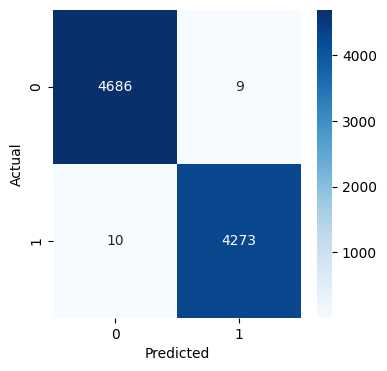

In [ ]:
%%time
#Plotting the performance on test set
y_pred = student_model_ISOT.predict(X_test)
y_pred = [1 if x[0] > 0.5 else 0 for x in y_pred]

print("Accuracy:", accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

confusion_matrix_m = confusion_matrix(y_test, y_pred)

confusion_matrix_m = pd.DataFrame(confusion_matrix_m, index=[0,1], columns=[0,1])
confusion_matrix_m.index.name = 'Actual'
confusion_matrix_m.columns.name = 'Predicted'

plt.figure(figsize = (4,4))
sns.heatmap(confusion_matrix_m, cmap= "Blues",annot = True, fmt='')

### STUDENT - Saving models

In [ ]:
#Saving model - WELFake
student_model_WELFake.save(file_name_model_student_WELFake, save_format='tf')

#Saving model - ISOT
student_model_ISOT.save(file_name_model_student_ISOT)

### STUDENT - Loading models

In [ ]:
#Loading model - WELFake
student_model_WELFake = load_model(file_name_model_student_WELFake, custom_objects=None, compile=True, safe_mode=True)

#Loading model - ISOT
student_model_ISOT = load_model(file_name_model_student_ISOT, custom_objects=None, compile=True, safe_mode=True)